**CAPSTONE MODUL 2 : SAAS SALES - YOGA NUGROHO**

****
# **Latar Belakang**
****

Sebuah perusahaan yang bergerak di bidang penjualan produk perangkat lunak kepada perusahaan lain (B2B) bekerja sama dengan seorang *data analyst* untuk menganalisa data yang perusahaan miliki. Perusahaan menemukan adanya penurunan nilai *profit* ketika nilai *sales* mengalami kenaikan, atau sebaliknya. Perusahaan juga ingin mengetahui efektifitasnya dalam pengelolaan biaya untuk mendapatkan *profit* atas *sales* saat ini, dan upaya untuk meningkatan keefektifitasannya di masa mendatang.

****
# **Pernyataan Masalah**
****

Perusahaan ingin mengetahui **seberapa efektif perusahaan dalam mengelola biaya dan menghasilkan laba bersih (profit) yang lebih tinggi atas pendapatannya (sales) melalui nilai net profit margin**.

Analisis ini nantinya dapat membantu perusahaan untuk meningkatkan kinerja perusahaan berdasarkan besarnya persentase laba bersih atas penjualan bersih, yang nantinya, perusahaan dapat mengetahui posisi perusahaan tersebut dibandingkan dengan rata-rata industrinya ketika sudah mengetahui nilai rata-rata industrinya.

Sebagai seorang *data analyst*, kita akan mencoba membantu perusahaan dengan menjawab pertanyaan berikut:

1. Bagaimana kondisi nilai *net profit margin* perusahaan saat ini?
- Berapa nilai *net profit margin* perusahaan saat ini?
- Berapa proporsi perbandingan, dan jumlah *profit*, *neutral* dan *loss* berdasarkan transaksi perusahaan saat ini?
- Bagaimana perkembangan *sales* dan *profit* perusahaan sampai ini?
<br><br>
2. Apa hal yang mempengaruhi nilai *net profit margin*?
- Bagaimana pengaruh kolom numerik terhadap nilai profit?
- Kolom apa yang menyebabkan penurunan nilai profit dan bagaimana kolom tersebut memengaruhi nilai net profit margin?
<br><br>
3. Apa upaya yang bisa dilakukan untuk meningkatkan nilai *profit*?
- Berapa jumlah sales dan profit berdasarkan produknya?
    - Produk mana yang memberikan margin profit tertinggi dan terendah?
    - Bagaimana kondisi pemberian discount terhadap product dengan margin tertinggi dan terendah?
- Berapa jumlah sales dan profit berdasarkan industri customer tergabung?
    - Industri customer tergabung mana yang menyumbangkan profit terendah?
    - Produk apa yang memberikan margin terendah pada industri customer tergabung dengan penyumbang profit terebdah tersebut?
- Berapa jumlah sales dan profit berdasarkan region?
    - Region mana yang menyumbangkan profit tertinggi dan terendah?
    - Kota mana yang merupakan kota terprofitable dan tidak profitable pada region penyumbang profit terendah?
    - Berapa jumlah profit dan loss produk terjual berdasarkan region?
<br><br>
4. Bagaimana kondisi dan persebaran kolom numerikal pada setiap negara?
- Negara mana yang memberikan total sales terbesar?
- Negara mana yang memberikan total profit terbesar?
- Negara mana yang diberikan discount profit terbesar?
- Negara mana yang membeli produk dengan quantity terbanyak?
<br><br>
5. Bagimana engagement dari pembeli dari waktu ke waktu?
<br><br>
6. Hal apa yang perlu dipertimbangkan dalam pemberian discount?
- Bagaimana karakteristik customer loyal?
- Siapa customer dengan total pembelian dan pengulangan pembelian terbanyak? 


****
# **Load Dataset**
****
Untuk menjawab pertanyaan di atas, mari kita lakukan analisa terhadap data transaksi penjualan produk yang dimiliki oleh perusahaan. Dataset dapat ditemukan [<font color='#B85048'><u>disini</u>](https://drive.google.com/file/d/1B6bzI1cmaVlR8hPwgBD3cecAUIkeCp6H/view?usp=drive_link)</font>.

In [87]:
# import library

# data analisis
import numpy as np
import pandas as pd

# statistika
from scipy.stats import normaltest, kruskal

# visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset
df = pd.read_csv('SaaS-Sales.csv')

Dataset ini berisi data transaksi dari perusahaan SaaS fiktif yang menjual perangkat lunak (software) kepada perusahaan lain (B2B). Dalam dataset ini, setiap baris mewakili satu transaksi. Dataset ini memiliki 19 kolom, yaitu sebagai berikut: 


| No | Nama Kolom           | Deskripsi                                                                                             |
|----|----------------------|-------------------------------------------------------------------------------------------------------|
| 1  | Row ID               | Pengenal unik untuk setiap transaksi                                                                  |
| 2  | Order ID             | Pengenal unik untuk setiap pesanan.                                                                   |
| 3  | Order Date           | Tanggal saat pesanan ditempatkan.                                                                     |
| 4  | Date Key             | Representasi numerik dari tanggal pesanan (YYYY-MM-DD).                                               |
| 5  | Contact Name         | Nama orang yang menempatkan pesanan.                                                                  |
| 6  | Country              | Negara di mana pesanan ditempatkan.                                                                   |
| 7  | City                 | Kota di mana pesanan ditempatkan.                                                                     |
| 8  | Region               | Wilayah di mana pesanan ditempatkan.                                                                  |
| 9  | Subregion            | Subwilayah di mana pesanan ditempatkan.                                                               |
| 10 | Customer             | Nama perusahaan yang menempatkan pesanan.                                                             |
| 11 | Customer ID          | Pengenal unik untuk setiap pelanggan.                                                                 |
| 12 | Industry             | Industri yang pelanggan tersebut tergabung.                                                           |
| 13 | Segment              | Segment pelanggan                                                                                     |
| 14 | Product              | Produk yang dipesan.                                                                                  |
| 15 | License              | Kunci lisensi untuk produk tersebut.                                                                  |
| 16 | Sales                | Jumlah penjualan total untuk transaksi.                                                               |
| 17 | Quantity             | Jumlah total barang dalam transaksi.                                                                  |
| 18 | Discount             | Diskon yang diberikan pada transaksi.                                                                 |
| 19 | Profit               | Keuntungan dari transaksi tersebut.                                                                   |

Berikut 5 baris teratas dan terbawah dari dataset SaaS_Sales.

In [3]:
# Menampilkan lima data teratas (.head()) dan lima data terbawah (.tail()) dari dataset SaaS-Sales
display(df.head(), df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


****
# **Data Understanding & Cleaning**
****
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

### **Pemahaman Data**

In [4]:
# Menampilkan informasi umum dari dataset dengan df.shape dan df.info()
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

In [5]:
# cek misisng value
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
# cek duplikat
df.duplicated().sum()

0

In [7]:
# deskriptif statistik numerikal
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# deskriptif statistik kategorikal
df.describe(include='object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Secara umum, kita bisa melihat bahwa:
* Dataset SaaS_Sales memiliki 9994 baris dan 19 kolom.
* Pada dataset ini, tidak ada kolom yang memiliki missing ataupun duplikat value.
* Kolom `Row ID` tidak relevan dengan analisis karena memiliki value yang sama dengan index dan akan dihapus.
* Kolom `Date Key` tidak relevan dengan analisis karena memiliki value yang sama dengan kolom `Order Date`. Perbedaannya, kolom `Order Date` menggunakan format penulisan DD/MM/YYYY, sedangkan kolom `Date Key` menggunakan format penulisan YYYDDMM, maka, kolom `Date Key` akan dihapus.
* Kolom `Order Date` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya berisikan tanggal dengan format DD/MM/YYYY, maka tipe data kolom `Order Date` akan diganti menjadi datetime.
* Kolom `Order Date` mewakili tanggal transaksi dilakukan. Maka, kolom `Order Month` akan dibuat agar nanti nanti kita dapat melakukan analisa terkait perkembangan dari waktu ke waktu berdasarkan bulan dan tahun transaksi dilakukan.
* Kolom `Licence` berisikan lisensi untuk setiap produk yang terjual, sehingga nilainya unik untuk setiap transaksi tercatat. Dalam analisis kali ini, kolom tersebut tidak diperlukan sehingga akan dihapus.
* Kolom `Profit` memiliki range dari 8399.976000 sampai -6599.978000. Angka ini masih cukup masuk akal, namun bisa dibuatkan kolom baru bernama `Profit Category` untuk memberikan keterangan bahwa bilangan positif menunjukan keuntungan atau 'profit' dan bilangan negatif menunjukan kerugian atau 'loss'
* Karena pada kolom `Profit` terdapat nilai negatif, maka diduga hal tersebut dikarenakan cost yang lebih besar dari pada sales. Makan, akan ditambahkan kolom `Cost` dengan cara mengurangi kolom `Sales` dengan `Profit`.

### **Drop Kolom Row ID, Date Key dan License**

In [9]:
df.drop(columns=['Row ID', 'Date Key', 'License'], inplace=True)

### **Merubah tipe data kolom Order Date**

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


### **Menambah kolom Profit Category**

In [11]:
# fungsi untuk menentukan kategori dari kolom profit
def profit_category(profit):
    if profit > 0:
        return 'Profit'
    elif profit < 0:
        return 'Loss'
    else:
        return 'Neutral'
    
# menerapkan fungsi profit_kategori pada kolom profit dengan .apply()
df['Profit Category'] = df['Profit'].apply(profit_category)

### **Menambah kolom Order Month**

In [12]:
# mengambil tahun dan bulan dari kolom Order Date
df['Order Month'] = df['Order Date'].apply(lambda x : str(x)[:7])
df['Order Month']

0       2022-11
1       2022-11
2       2022-06
3       2021-10
4       2021-10
         ...   
9989    2020-01
9990    2023-02
9991    2023-02
9992    2023-02
9993    2023-05
Name: Order Month, Length: 9994, dtype: object

Dapat dilihat bahwa kolom Order Month sudah berhasil terbuat dengan format YYYY-MM, namun, tipe data kolom tersebut masih berupa object, maka akan diganti menjadi datetime.

In [13]:
# mengubah tipe data Order Month dari str menjadi datetime
df['Order Month'] = pd.to_datetime(df['Order Month'])
df['Order Month']

0      2022-11-01
1      2022-11-01
2      2022-06-01
3      2021-10-01
4      2021-10-01
          ...    
9989   2020-01-01
9990   2023-02-01
9991   2023-02-01
9992   2023-02-01
9993   2023-05-01
Name: Order Month, Length: 9994, dtype: datetime64[ns]

### **Menambah kolom Cost**

In [14]:
# kolom cost dibuat dengan mengurangi nilai sales dengan profit
df['Cost'] = df['Sales'] - df['Profit']

### **DataFrame Bersih**

In [15]:
# Mengurutkan kolom agar informasi lebih mudah dibaca
df = df[['Order ID', 'Customer ID', 'Region', 'Country', 'City', 'Order Date', 'Order Month', 'Contact Name', 'Customer', 'Industry', 'Segment', 'Product', 'Quantity', 'Discount',  'Sales', 'Cost', 'Profit', 'Profit Category' ]]
df.head()

,Order ID,Customer ID,Region,Country,City,Order Date,Order Month,Contact Name,Customer,Industry,Segment,Product,Quantity,Discount,Sales,Cost,Profit,Profit Category
0,EMEA-2022-152156,1017,EMEA,Ireland,Dublin,2022-11-09,2022-11-01,Nathan Bell,Chevron,Energy,SMB,Marketing Suite,2,0.00,261.9600,220.0464,41.9136,Profit
1,EMEA-2022-152156,1017,EMEA,Ireland,Dublin,2022-11-09,2022-11-01,Nathan Bell,Chevron,Energy,SMB,FinanceHub,3,0.00,731.9400,512.3580,219.5820,Profit
2,AMER-2022-138688,1056,AMER,United States,New York City,2022-06-13,2022-06-01,Deirdre Bailey,Phillips 66,Energy,Strategic,FinanceHub,2,0.00,14.6200,7.7486,6.8714,Profit
3,EMEA-2021-108966,1031,EMEA,Germany,Stuttgart,2021-10-11,2021-10-01,Zoe Hodges,Royal Dutch Shell,Energy,SMB,ContactMatcher,5,0.45,957.5775,1340.6085,-383.0310,Loss
4,EMEA-2021-108966,1031,EMEA,Germany,Stuttgart,2021-10-11,2021-10-01,Zoe Hodges,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,2,0.20,22.3680,19.8516,2.5164,Profit


### **Distribusi Data & Deteksi Outlier**

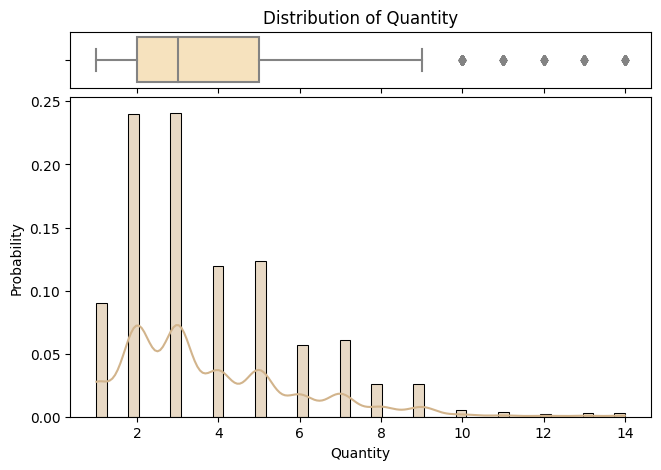

In [16]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5), gridspec_kw={'height_ratios':(.15, .85),'hspace':0.05})

ax1.set_title('Distribution of Quantity')
sns.boxplot(x=df['Quantity'], ax=ax1, color='moccasin')
ax1.set(xlabel='')

sns.histplot(data=df['Quantity'], ax=ax2, stat='probability', kde=True, bins=50, color='tan')
plt.show()

In [17]:
stat, pvalue = normaltest(df['Quantity'])

if pvalue > 0.05:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan bahwa data TIDAK terdistribusi normal


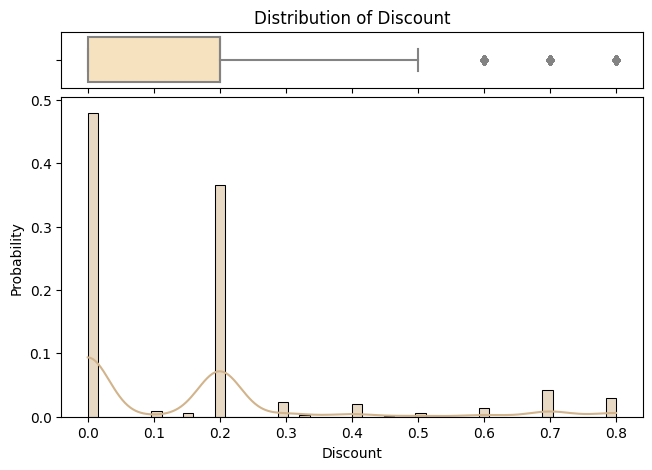

In [18]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5), gridspec_kw={'height_ratios':(.15, .85),'hspace':0.05})

ax1.set_title('Distribution of Discount')
sns.boxplot(x=df['Discount'], ax=ax1, color='moccasin')
ax1.set(xlabel='')

sns.histplot(data=df['Discount'], ax=ax2, stat='probability', kde=True, bins=50, color='tan')
plt.show()

In [19]:
stat, pvalue = normaltest(df['Discount'])

if pvalue > 0.05:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan bahwa data TIDAK terdistribusi normal


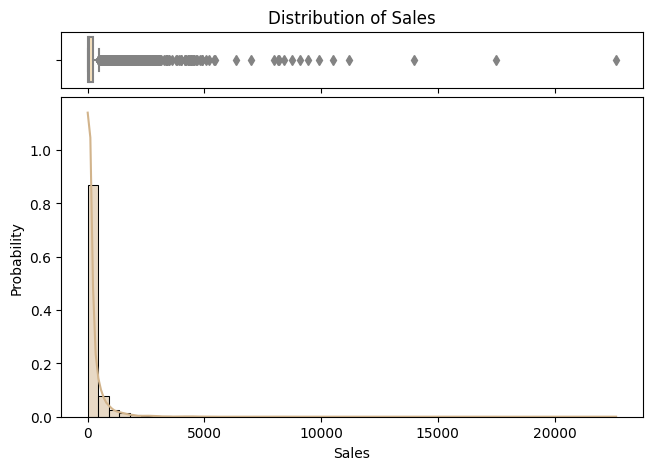

In [20]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5), gridspec_kw={'height_ratios':(.15, .85),'hspace':0.05})

ax1.set_title('Distribution of Sales')
sns.boxplot(x=df['Sales'], ax=ax1, color='moccasin')
ax1.set(xlabel='')

sns.histplot(data=df['Sales'], ax=ax2, stat='probability', kde=True, bins=50, color='tan')
plt.show()

In [21]:
stat, pvalue = normaltest(df['Sales'])

if pvalue > 0.05:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan bahwa data TIDAK terdistribusi normal


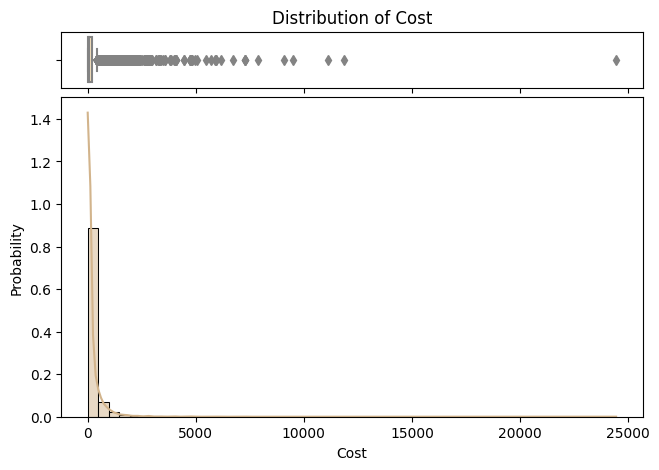

In [22]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5), gridspec_kw={'height_ratios':(.15, .85),'hspace':0.05})

ax1.set_title('Distribution of Cost')
sns.boxplot(x=df['Cost'], ax=ax1, color='moccasin')
ax1.set(xlabel='')

sns.histplot(data=df['Cost'], ax=ax2, stat='probability', kde=True, bins=50, color='tan')
plt.show()

In [23]:
stat, pvalue = normaltest(df['Cost'])

if pvalue > 0.05:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan bahwa data TIDAK terdistribusi normal


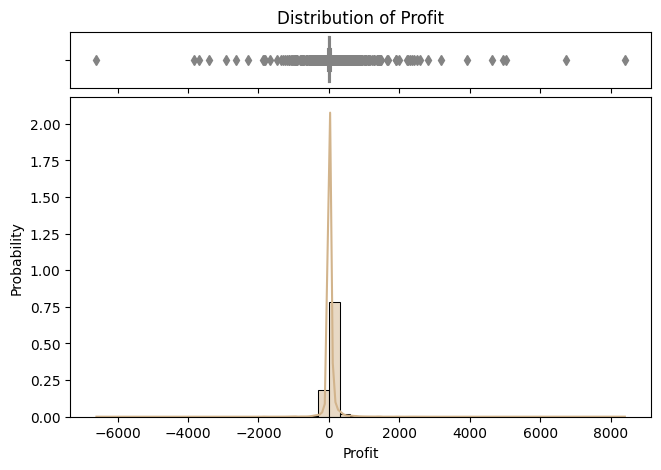

In [24]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5), gridspec_kw={'height_ratios':(.15, .85),'hspace':0.05})

ax1.set_title('Distribution of Profit')
sns.boxplot(x=df['Profit'], ax=ax1, color='moccasin')
ax1.set(xlabel='')

sns.histplot(data=df['Profit'], ax=ax2, stat='probability', kde=True, bins=50, color='tan')
plt.show()

In [25]:
stat, pvalue = normaltest(df['Profit'])

if pvalue > 0.05:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan bahwa data TIDAK terdistribusi normal


**Penjelasan**

- Terlihat pada gambar maupun pada saat diuji normalitas, tidak ada kolom yang berdistribusi normal pada kolom quantity, discount, sales, cost dan profit.
- Outlier ditemukan pada kolom quantity, discount, sales, cost dan profit.
- Outlier pada kolom-kolom tersebut tidak perlu dihilangkan karena masih diperlukan untuk analisis karena masih dirasa wajar.

In [26]:
# export sebagai file excel untuk dianalisis di TABLEAU
df.to_excel('SaaS_Sales_Clean.xlsx', index=False)

****
# **Data Analisis**
****

### **Analisis Nilai Net Profit Margin**

Sugiono dan Untung (2016:67) menjelaskan bahwa Net Profit Margin merupakan rasio yang menunjukkan berapa besar keuntungan bersih yang diperoleh perusahaan.

Jika profit margin suatu perusahaan lebih rendah dari rata-rata industrinya, maka hal ini dapat disebabkan oleh harga jual perusahaan lebih rendah dari pada perusahaan pesaing, ataupun kedua-duanya. Namun, karena kita tidak memiliki data nilai rata-rata industrinya, untuk saat ini,kita tidak dapat mengetahui posisi perusahaan dalam industrinya.

In [27]:
# mencari nilai net profit margin
npm = round(df['Profit'].sum() / df['Sales'].sum() * 100, 2)
print(f'Nilai net profit margin (NPM) perusahaan ini adalah {npm}%')

Nilai net profit margin (NPM) perusahaan ini adalah 12.47%



Nilai 12.47% berarti dalam $1 atas *sales*, perusahaan ini memperoleh *profit* sebesar $0.12. 

Bagaimana cara meningkatkan nilai ini? Mari kita analisa lebih lanjut.

In [28]:
# membuat dataframe yang memuat jumlah kemunculan dan persentase dari profit berdasarkan kategorinya
df_profit_category = pd.DataFrame(data=df['Profit Category'].value_counts()).reset_index()
df_profit_category['Profit Category Percentage'] = round(df_profit_category['count'] / df_profit_category['count'].sum() * 100, 2)

# merubah nama kolom 'count' menjadi 'Jumlah' 
df_profit_category = df_profit_category.rename(columns={'count':'Jumlah'})

# menampilkan dataframe
df_profit_category

,Profit Category,Jumlah,Profit Category Percentage
0,Profit,8058,80.63
1,Loss,1871,18.72
2,Neutral,65,0.65


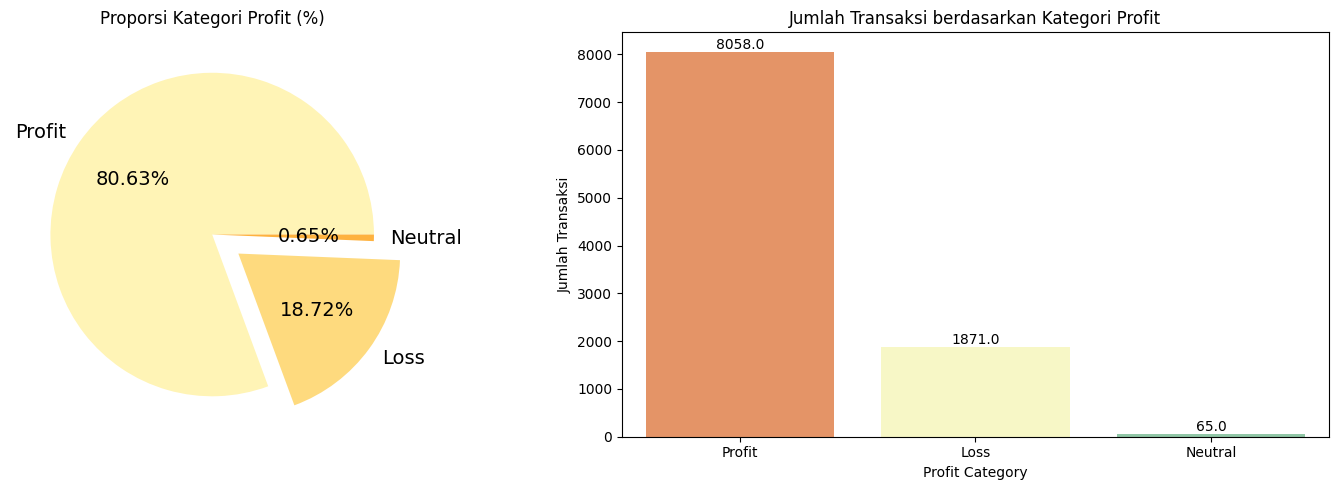

In [29]:
# mengatur ukuran plot
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)  
plt.pie(
    # isi dengan kolom numerikal
    x           = df_profit_category['Jumlah'],    
    # isi dengan kolom kategorikal                  
    labels      = df_profit_category['Profit Category'],             
    # menampilkan persentase dengan dua angka desimal di belakang koma
    autopct     = '%1.2f%%',                          
    # menggeser kategori 'loss' sejauh 0.2, sedangkan yang lain posisinya tetap
    explode     = [0, 0.2, 0], 
    # mengatur ukuran font
    textprops   = {'fontsize':14},                    
    # merubah warna pie chart
    colors      = sns.color_palette('YlOrBr'), 
)

# membuat judul pie chart
plt.title('Proporsi Kategori Profit (%)')

plt.subplot(1,2,2)
ax = sns.barplot(
    data=df_profit_category, 
    y='Jumlah', 
    x='Profit Category', 
    errorbar=('ci', 0),
    palette='Spectral'
)  

# menampilkan label (angka) pada bar
container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])
# mengganti label sumbu Y pada barchart
plt.ylabel('Jumlah Transaksi')

# membuat judul pie chart
plt.title('Jumlah Transaksi berdasarkan Kategori Profit')
# agar fit ke ukuran figure
plt.tight_layout()
# menampilkan pie chart
plt.show()

**INSIGHT**

- Dari 9994 transaksi tercatat, sebanyak 8058 atau 80.63% memberikan keuntungan (Profit), sebanyak 1871 atau 0.65% tidak memberikan keuntungan maupun kerugian (Neutral) dan sisanya sebanyak 65 atau 18.72% memberikan kerugian (loss). 
- Kondisi ini saja sudah terbilang bagus, namun, perusahaan pasti menginginkan proporsi profit lebih besar dan proporsi kerugian yang lebih kecil. 
- Untuk meningkatan nilai NPM, bisa dengan memperbesar proporsi keuntungan (profit) atau memperkecil proporsi kerugian (loss)
- Maka, bagaimana pertumbuhan sales dan profit dari bulan ke bulan pada perusahaan ini? Mari kita analisa lebih lanjut

In [30]:
# membuat dataframe yang berisikan total sales, cost dan profit berdasarkan order month
df_avg_salescostprofit_per_month = df.groupby('Order Month')[['Sales','Cost', 'Profit']].sum().reset_index()
df_avg_salescostprofit_per_month

,Order Month,Sales,Cost,Profit
0,2020-01-01,13946.2290,11499.4579,2446.7711
1,2020-02-01,4810.5580,3944.8300,865.7280
2,2020-03-01,55691.0090,55192.2791,498.7299
3,2020-04-01,28295.3450,24806.5098,3488.8352
4,2020-05-01,23648.2870,20909.5774,2738.7096
5,2020-06-01,34595.1276,29618.6032,4976.5244
6,2020-07-01,33946.3930,34787.8756,-841.4826
7,2020-08-01,27909.4685,22591.3635,5318.1050
8,2020-09-01,81777.3508,73449.2514,8328.0994
9,2020-10-01,31453.3930,28005.1357,3448.2573


Dapat dilihat dari dataframe di atas, peningkatan sales tidak selalu berbanding lurus dengan peningkatan profit.

In [31]:
# melihat kerugian (profit < 0 atau sales < cost)
df_avg_salescostprofit_per_month[df_avg_salescostprofit_per_month['Sales'] < df_avg_salescostprofit_per_month['Cost']]

,Order Month,Sales,Cost,Profit
6,2020-07-01,33946.3930,34787.8756,-841.4826
12,2021-01-01,18174.0756,21455.0826,-3281.0070


Bahkan, total profit pada bulan Juli 2020 dan Januari 2021 menyebabkan kerugian (loss) karena nilai profit yang negatif.

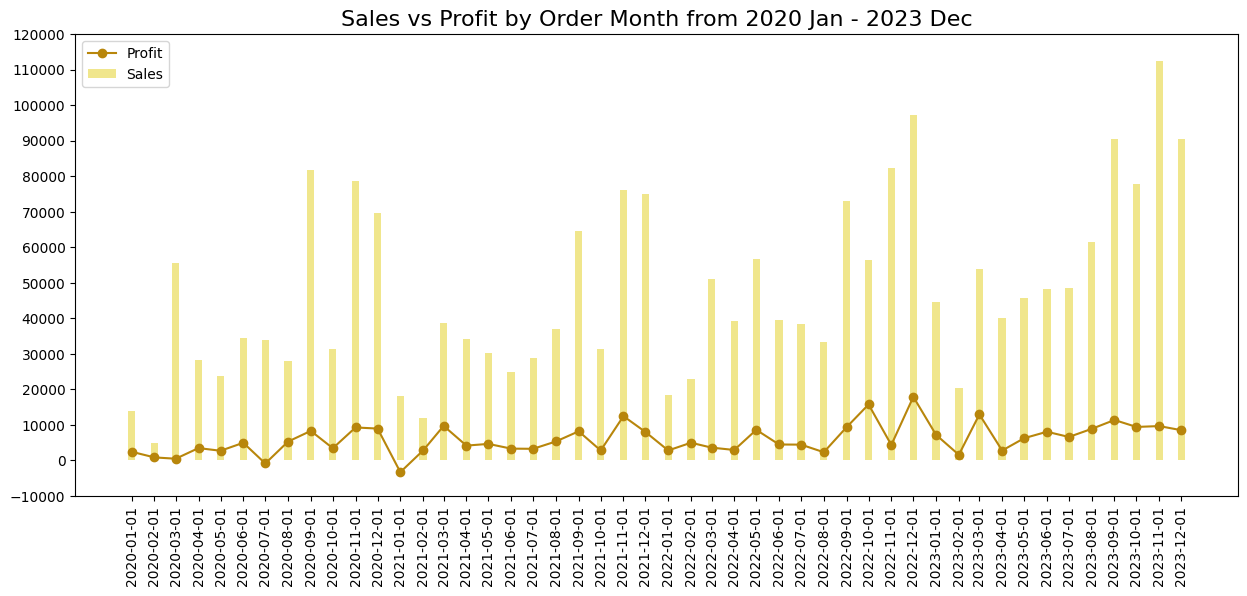

In [32]:
plt.figure(figsize=(15,6))

plt.bar(
    df_avg_salescostprofit_per_month['Order Month'],
    df_avg_salescostprofit_per_month['Sales'],
    width=10,
    color='khaki'
)

plt.plot(
    df_avg_salescostprofit_per_month['Order Month'],              
    df_avg_salescostprofit_per_month['Profit'],
    color='darkgoldenrod',
    marker='o'
)

plt.title('Sales vs Profit by Order Month from 2020 Jan - 2023 Dec', size=16)
plt.xticks(ticks = df_avg_salescostprofit_per_month['Order Month'], rotation=90)
plt.legend(['Profit', 'Sales'])
plt.yticks(range(-10000, 120001, 10000))

plt.show()

**INSIGHT**

- Fluktuasi *Sales* dan *Profit* terjadi sepanjang tahun selama 4 tahun berjalan
- Perusahaan pasti mengharapkan *profit* yang meningkat ketika nilai *sales* meningkat, namun, dari grafik di atas, terdapat beberapa kali penurunan *profit* ketika *sales* mengalami peningkatan. Seperti pada bulan Maret 2020, Maret 2022, November 2022.
- Terdapat pula kondisi dimana *sales* turun, namun *profit* naik. Seperti pada bulan April 2020, Agustus 2020, Februari 2021, dan bulan-bulan lainnya.
- Terlihat pada bulan Juli 2020 dan Januari 2021, nilai *profit* turun bahkan sampai bernilai negatif dan menyebabkan kerugian (loss).
- Jarak antara titik linechart dengan bagian atas barchart merupakan *cost*. Sehingga, kerugian (loss) disebabkan oleh nilai *cost* yang lebih tinggi daripada nilai *sales*nya

Mari kita lihat kondisi pada saat perusahaan mengalami kerugian (loss) tertinggi, yaitu Januari 2021

In [33]:
# memeriksa bulan dengan loss tertinggi (Januari 2021)
dict_sales_profit_jan21 = {
    'Sum of Sales'     : df['Sales'][df['Order Month'] == '2021-01-01'].sum(),
    'Sum of Cost'      : df['Cost'][df['Order Month'] == '2021-01-01'].sum(),
    'Sum of Profit'    : df['Profit'][df['Order Month'] == '2021-01-01'].sum()
}

df_sales_profit_jan21 = pd.DataFrame(data=dict_sales_profit_jan21, index=['values'])
df_sales_profit_jan21

,Sum of Sales,Sum of Cost,Sum of Profit
values,18174.0756,21455.0826,-3281.007


- Pada bulan Januari 2021, ketika nilai sales pada tahun 2021 sebesar 18174.0756, nilai profit mengalami penurunan yang sangat signifikan, bahkan sampai menyebabkan kerugian (loss) sebesar 3281.007.
- Dari fenomena tersebut, dugaan sementara, kerugian (loss) bisa jadi disebabkan karena nilai cost yang lebih besar dari nilai sales.
- Maka, mari kita analisis, dari data tersedia, hal-hal apa saja yang mempengaruhi nilai profit sehingga mempengaruhi nilai *net profit margin*

### **Hal-Hal yang Memengaruhi Nilai Profit**

Mari kita cari tahu, bagaimana kolom-kolom numerik memengaruhi nilai *profit*

In [34]:
# Membuat ukuran korelasi untuk mengukur kekuatan dan arah hubungan
correlation = df[['Quantity', 'Discount', 'Sales','Profit']].corr()
correlation

,Quantity,Discount,Sales,Profit
Quantity,1.000000,0.008623,0.200795,0.066253
Discount,0.008623,1.000000,-0.028190,-0.219487
Sales,0.200795,-0.028190,1.000000,0.479064
Profit,0.066253,-0.219487,0.479064,1.000000


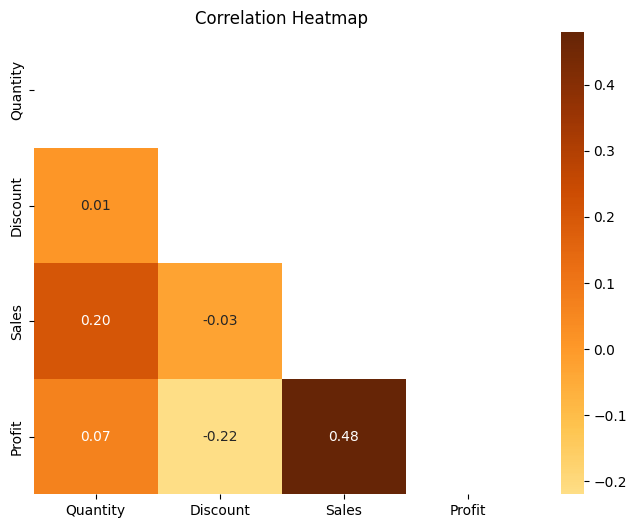

In [35]:
matriks = np.triu(correlation)

plt.figure(figsize=(8,6))
sns.heatmap(
    data = correlation,
    annot = True,                   # menampilkan label
    fmt = '.2f',                    # mengubah format menjadi '.2f' atau 2 angka dibelakang koma
    cmap = 'YlOrBr',                # mengatur palette warna   
    center = 0,                     # mengatur titik pusat pada angka berapa (dalam hal ini di angka 0)
    mask = matriks                  # unutk menampilkan nilai tertentu saja berdasarkan variable matiks
)

plt.title('Correlation Heatmap')
plt.show()

**Insight**

- Warna gelap menunjukkan hubungan yang semakin kuat
- Warna coklat menunjukkan hubungan positif, semakin gelap warna coklatnya maka hubungannya positif dan semakin kuat
- Warna kuning menunjukkan hubungan negatif, semakin terang warna kuningnya maka hubungannya negatif dan semakin kuat
- Warna pucat menunjukkan korelasi semakin lemah
- *Sales* dan *Profit* menunjukkan hubungan positif moderat, semakin tinggi nilai *Sales*, maka semakin tinggi juga *Profit*-nya.
- *Quantity* dan *Profit* menunjukkan hubungan positif weak, semakin tinggi nilai *Quantity*, maka semakin tinggi juga *Profit*-nya.
- *Discount* dan *Profit* menunjukkan hubungan negatif lemah, semakin tinggi nilai *Discount*, maka semakin rendah *Profit*-nya.

*Discount* merupakan satu-satunya variabel yang berpengaruh negatif terhadap *profit*. Maka, mari kita lihat bagaimana kondisi *discount* yang diberikan terhadap *profit* pada transaksi di bulan Januari 2021

In [36]:
# melihat diskon dan profit yang terjadi pada transaksi januari 2021
df_disc_profit = df[df['Order Month'] == '2021-01-01'].groupby('Discount')[['Profit']].median().reset_index()
df_disc_profit

,Discount,Profit
0,0.00,16.5354
1,0.20,4.6088
2,0.30,-13.1706
3,0.32,-437.5404
4,0.40,-39.6854
5,0.50,-244.3230
6,0.60,-312.0614
7,0.70,-475.8783


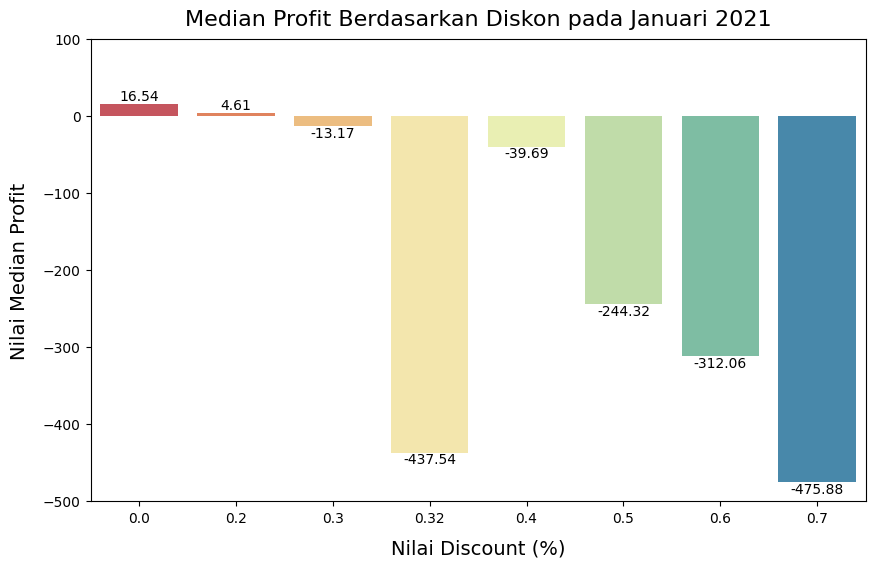

In [37]:
plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=df_disc_profit, 
    x='Discount', 
    y='Profit', 
    errorbar=('ci', 0),
    palette='Spectral')

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues])
plt.title('Median Profit Berdasarkan Diskon pada Januari 2021', size=16, pad=10) # pad --> mengatur jarak antara judul dengan grafik
plt.ylabel('Nilai Median Profit', size=14, labelpad = 10)
plt.xlabel('Nilai Discount (%)', size=14, labelpad = 10)
plt.yticks(range(-500,101,100)) 
plt.show()

**Insight**

- Pada bulan Januari 2021, pemberian diskon diantara 0 - 20% masih memberikan keuntungan (profit), namun, pemberian diskon lebih dari itu memberikan kerugian (loss).

Mari kita lihat kondisi pemberian *discount* terhadap *profit* secara keseluruhan

In [38]:
# mengelompokan profit berdasarkan discount yang diberikan
df.groupby('Discount')[['Profit']].median().reset_index().sort_values('Discount')

,Discount,Profit
0,0.00,15.9952
1,0.10,54.3240
2,0.15,14.0980
3,0.20,6.4944
4,0.30,-25.3764
5,0.32,-46.9764
6,0.40,-57.6242
7,0.45,-167.3184
8,0.50,-185.2767
9,0.60,-12.0617


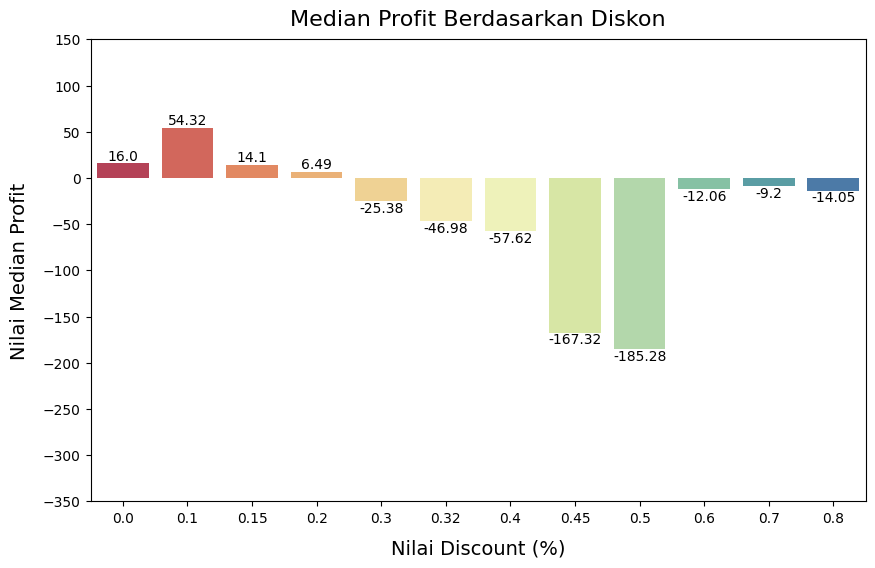

In [39]:
plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=df, 
    x='Discount', 
    y='Profit', 
    errorbar=('ci', 0),
    palette='Spectral',
    estimator=np.median)

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues])
plt.title('Median Profit Berdasarkan Diskon', size=16, pad=10) # pad --> mengatur jarak antara judul dengan grafik
plt.ylabel('Nilai Median Profit', size=14, labelpad = 10)
plt.xlabel('Nilai Discount (%)', size=14, labelpad = 10)
plt.yticks(range(-350,151,50)) 
plt.show()

**Insight**

- Secara keseluruhan, pemberian diskon kurang dari 30% masih memberikan keuntungan (profit), namun, pemberian diskon lebih dari itu memberikan kerugian (loss).
- Untuk memastikan, mari kita lihat produk yang memberikan profit atau loss ketika diberikan disount lebih dari sama dengan 30%

In [40]:
# membuat dataframe berisi kolom discount, product dan profit dengan memfilter discount >= 30%
product_disc_30 = df[df['Discount'] >= 0.3].groupby(['Discount','Product'])['Profit'].median().reset_index()

# mengurutkan dataframe dari nilai profit tertinggi (profit)
product_disc_30.sort_values('Profit', ascending=False)

# memfilter product yang memberikan profit positif (profit) pada kondisi pemberian diskon >= 30%
product_disc_30[product_disc_30['Profit'] > 0]

,Discount,Product,Profit
0,0.3,Big Ol Database,43.1991
5,0.4,Alchemy,125.9972


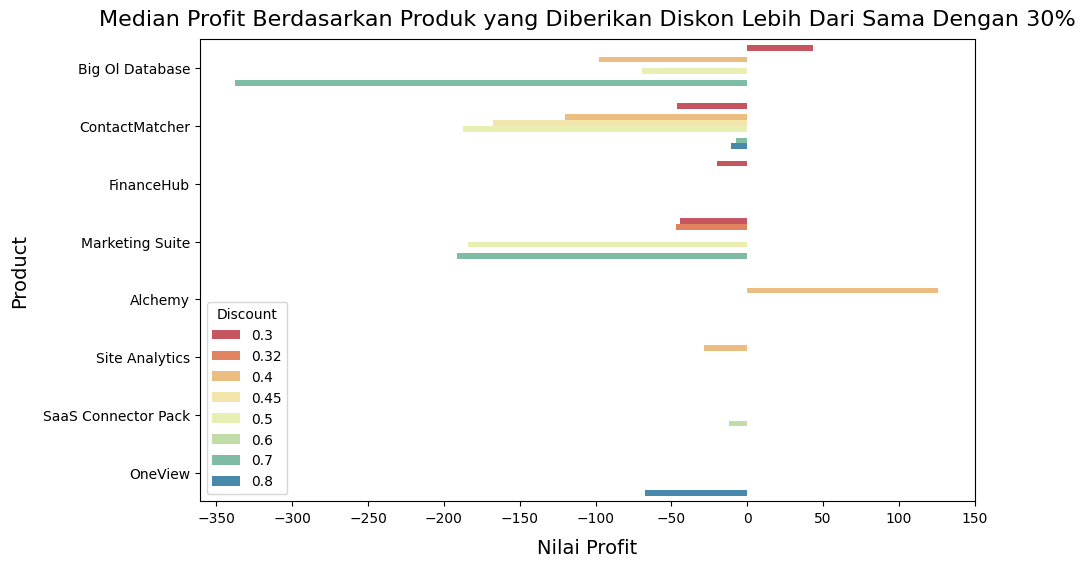

In [41]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=product_disc_30, 
    y='Product', 
    x='Profit', 
    hue='Discount',
    errorbar=('ci', 0),
    palette='Spectral')

plt.title('Median Profit Berdasarkan Produk yang Diberikan Diskon Lebih Dari Sama Dengan 30%', size=16, pad=10) # pad --> mengatur jarak antara judul dengan grafik
plt.ylabel('Product', size=14, labelpad = 10)
plt.xlabel('Nilai Profit', size=14, labelpad = 10)
plt.xticks(range(-350,151,50)) 
plt.show()

**Insight**

- Dari total 14 produk yang dijual, hanya ada 8 produk yang diberikan diskon lebih dari sama dengan 30%
- Dari 8 produk dengan pemberian diskon lebih dari sama dengan 30%, hanya Big Ol Database (pemberian diskon 30%) dan Alchemy (pemberian diskon 40%) yang memberikan keuntungan (profit). Sisanya, memberikan kerugian (loss).

### **Analisis Upaya Peningkatan Nilai Profit**

**Total *sales* dan total *profit* berdasarkan *product***

In [42]:
sales_by_product = df.groupby('Product')[['Sales']].sum().reset_index().sort_values('Sales', ascending=False)
sales_by_product

,Product,Sales
3,ContactMatcher,410378.2650
5,FinanceHub,340935.4150
11,Site Analytics,330007.0540
7,Marketing Suite - Gold,223843.6080
1,Big Ol Database,189238.6310
4,Data Smasher,167380.3180
0,Alchemy,149528.0300
13,Support,125152.7440
6,Marketing Suite,114879.9963
8,OneView,107532.1610


In [43]:
profit_by_product = df.groupby('Product')[['Profit']].sum().reset_index().sort_values('Profit', ascending=False)
profit_by_product

,Product,Profit
0,Alchemy,55617.8249
11,Site Analytics,44515.7306
4,Data Smasher,41936.6357
13,Support,32864.4698
5,FinanceHub,32136.4203
7,Marketing Suite - Gold,21278.8264
8,OneView,18138.0054
9,SaaS Connector Pack,13059.1436
3,ContactMatcher,12496.2822
10,SaaS Connector Pack - Gold,6964.1767


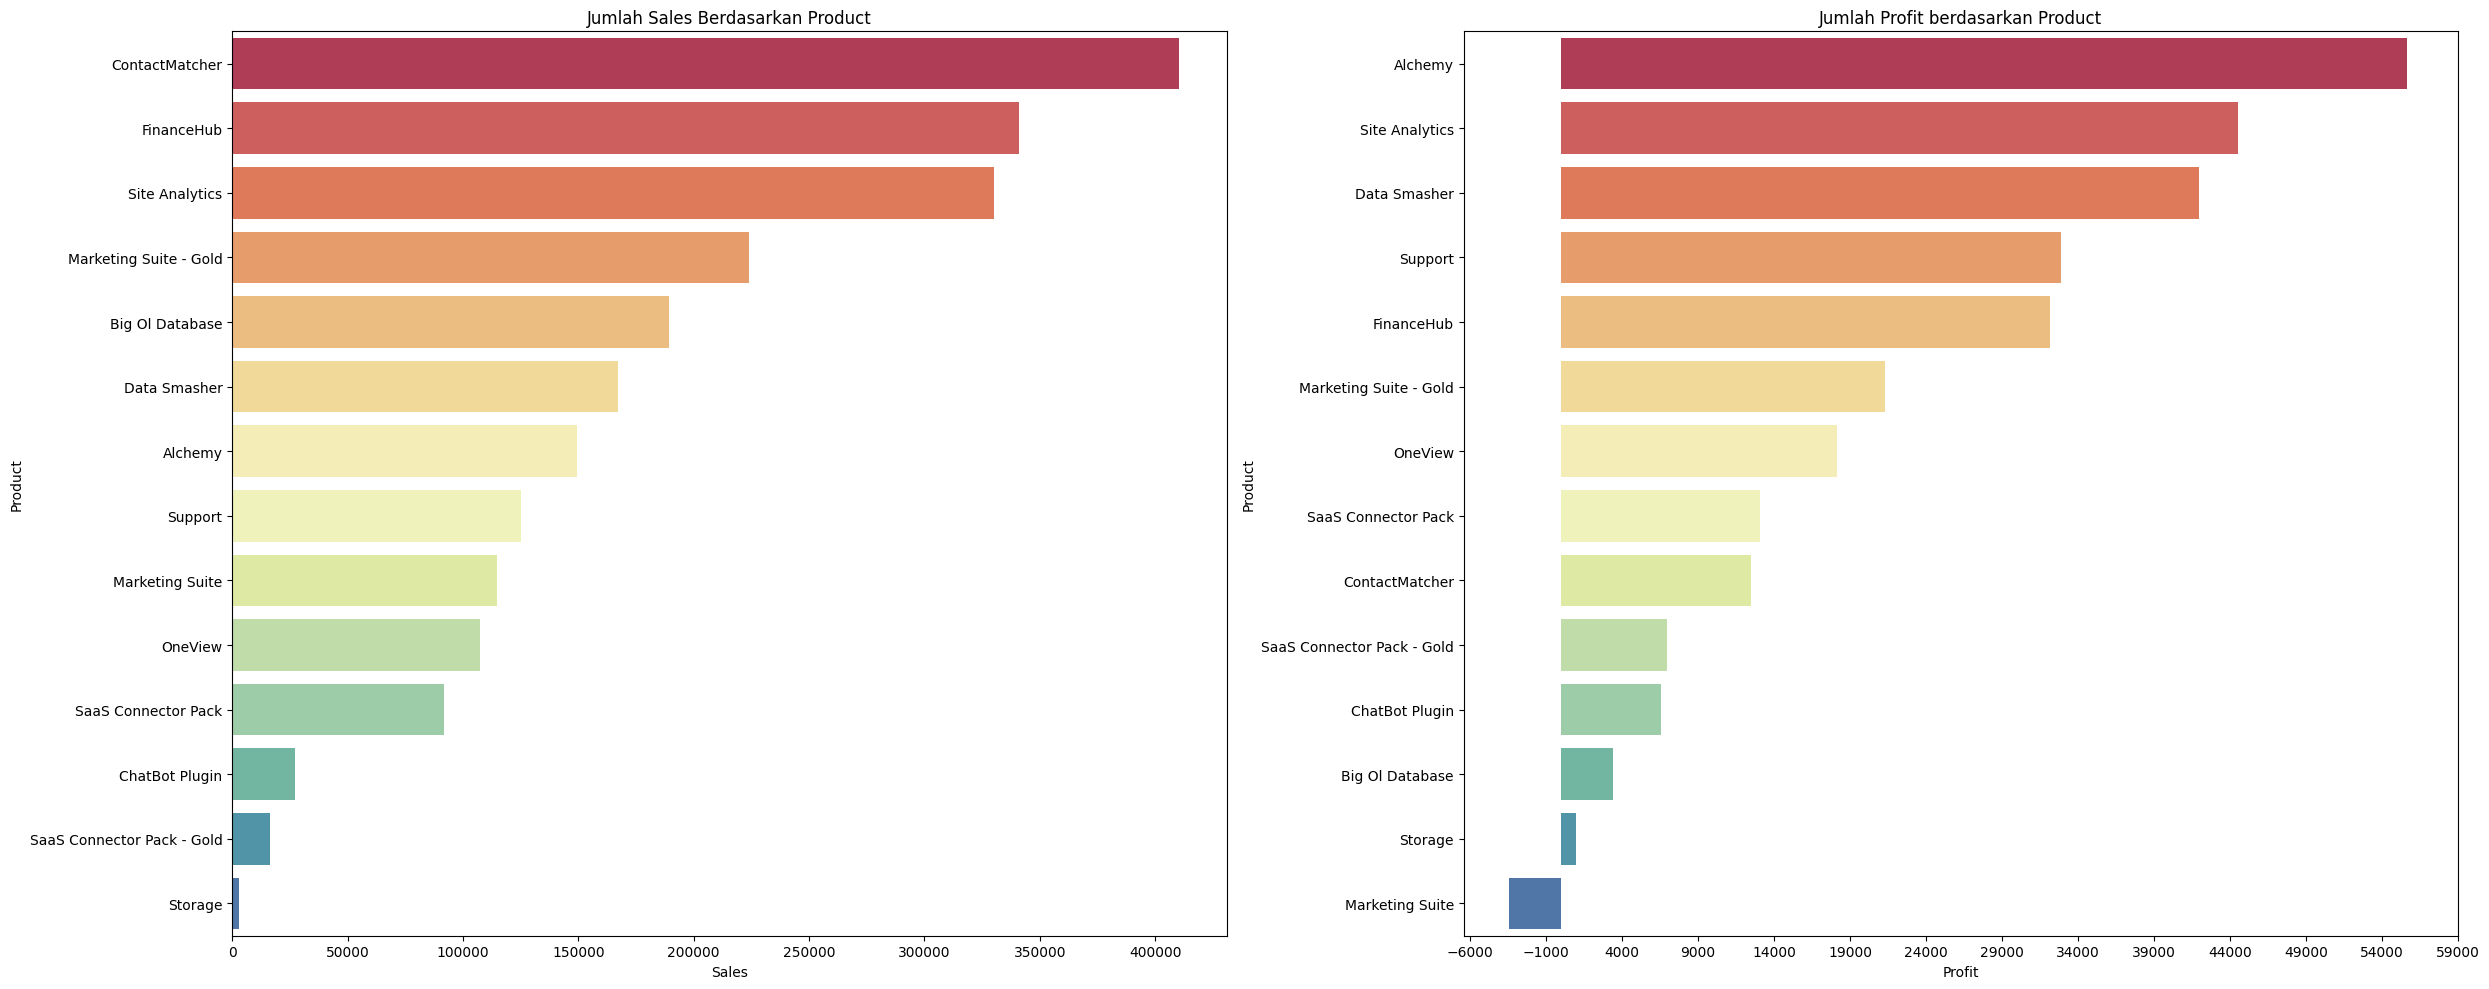

In [44]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)                
sns.barplot(data=sales_by_product, 
            x='Sales', 
            y='Product', 
            errorbar=('ci', 0), 
            estimator=np.sum,
            palette='Spectral')
plt.title('Jumlah Sales Berdasarkan Product')

plt.subplot(1,2,2)
sns.barplot(data=profit_by_product, 
            x='Profit', 
            y='Product', 
            errorbar=('ci', 0), 
            estimator=np.sum,
            palette='Spectral')
plt.title('Jumlah Profit berdasarkan Product')

plt.xticks(range(-6000,60001,5000))  
plt.tight_layout()

**Insight**

- Produk yang memberikan *total sales terbesar* adalah ContactMacher (410378.2650), sedangkan produk yang memberikan *total sales terendah* adalah Storage (3024.2800).
- Produk yang memberikan *total profit terbesar* adalah Alchemy (55617.8249), sedangkan produk yang memberikan *total profit terendah* (loss) adalah Marketing Suite (-3472.5560).

Marketing Suite memberikan *profit* terbesar ke-9 secara keseluruhan, namun memberikan *profit* terendah, bahkan bernilai negatif sehingga memberikan kerugian (loss). Mari kita lihat lebih jauh.

**Product dengan Net *Profit Margin* Tertinggi dan Terendah**

In [45]:
# menggabungkan df sales_by_product dan profit_by_product
npm_product = pd.merge(left=sales_by_product, right=profit_by_product, on='Product')

# membuat kolom NPM dengan membagi profit dan sales
npm_product['NPM'] = npm_product['Profit'] / npm_product['Sales'] * 100

# mengurutkan nilai npm dari yang terbesar
npm_product = npm_product.sort_values('NPM', ascending=False)
npm_product

,Product,Sales,Profit,NPM
12,SaaS Connector Pack - Gold,16476.4020,6964.1767,42.267582
6,Alchemy,149528.0300,55617.8249,37.195585
13,Storage,3024.2800,949.5182,31.396504
7,Support,125152.7440,32864.4698,26.259488
5,Data Smasher,167380.3180,41936.6357,25.054700
11,ChatBot Plugin,27118.7920,6527.7870,24.071083
9,OneView,107532.1610,18138.0054,16.867517
10,SaaS Connector Pack,91705.1640,13059.1436,14.240358
2,Site Analytics,330007.0540,44515.7306,13.489327
3,Marketing Suite - Gold,223843.6080,21278.8264,9.506113


In [46]:
# informasi mengenai Marketing Suite
npm_product.tail(1)

,Product,Sales,Profit,NPM
8,Marketing Suite,114879.9963,-3472.556,-3.022768


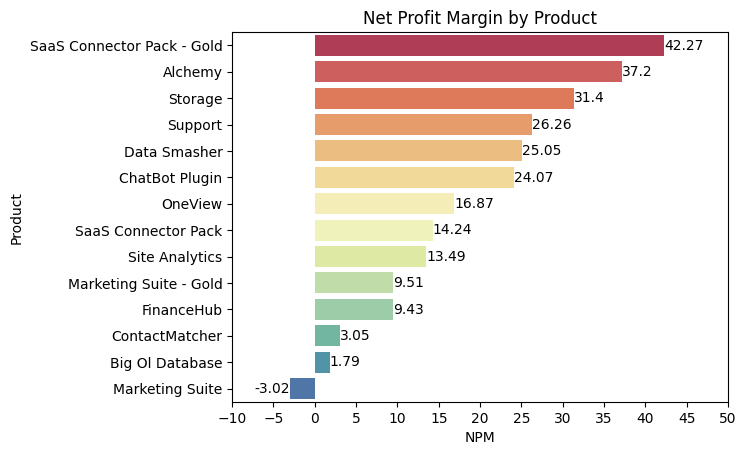

In [47]:
ax = sns.barplot(data=npm_product, 
            x='NPM', 
            y='Product', 
            errorbar=('ci', 0), 
            estimator=np.sum,
            palette='Spectral')

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues])
plt.title('Net Profit Margin by Product')
plt.xticks(range(-10,51,5))  
plt.show()

- SaaS Connector Pack - Gold memberikan margin profit paling besar terhadap perusahaan, sedangkan Marketing Suite memberikan kerugian.
- Nilai profit margin SaaS Connector Pack - Gold sebesar 42.27% artinya dalam $1 atas penjualan produk Marketting Suite, perusahaan memperoleh keuntungan sebesar $0.42. 
- Nilai profit margin Marketing Suite sebesar -3.02% artinya dalam $1 atas penjualan produk Marketting Suite, perusahaan memperoleh kerugian sebesar $0.03. 
- Analasis sebelumnya menyatakan bahwa pemberian diskon lebih dari sama dengan 30% memberikan kerugian(loss), apakah hal tesebut juga yang menyebabkan kerugian (loss) pada produk Marketing Suite?

**Perbandingan Kondisi Pemberian *Discount* terhadap *Product* dengan Nilai NPM Tertinggi dan Terendah**

In [48]:
# Informasi nilai median profit berdasarkan pemberian diskon pada produk SaaS Connector Pack - Gold
df_SaaS_Connector_Pack_Gold = df_marketing_suite = df[df['Product'] == 'SaaS Connector Pack - Gold'].groupby('Discount')[['Sales','Cost','Profit']].median().reset_index()
df_SaaS_Connector_Pack_Gold

,Discount,Sales,Cost,Profit
0,0.0,34.350,17.1750,16.56525
1,0.2,24.448,16.1568,8.83220


In [49]:
# Informasi nilai median profit berdasarkan pemberian diskon pada produk Marketing Suite
df_marketing_suite = df[df['Product'] == 'Marketing Suite'].groupby('Discount')[['Sales','Cost','Profit']].median().reset_index()
df_marketing_suite

,Discount,Sales,Cost,Profit
0,0.00,302.4500,237.4159,53.0153
1,0.15,359.4990,389.1048,14.0980
2,0.20,317.9600,330.0696,-1.9432
3,0.30,372.0010,442.6398,-44.4352
4,0.32,328.3992,420.1578,-46.9764
5,0.50,300.7225,485.0140,-183.8015
6,0.70,127.7640,319.4100,-191.6460


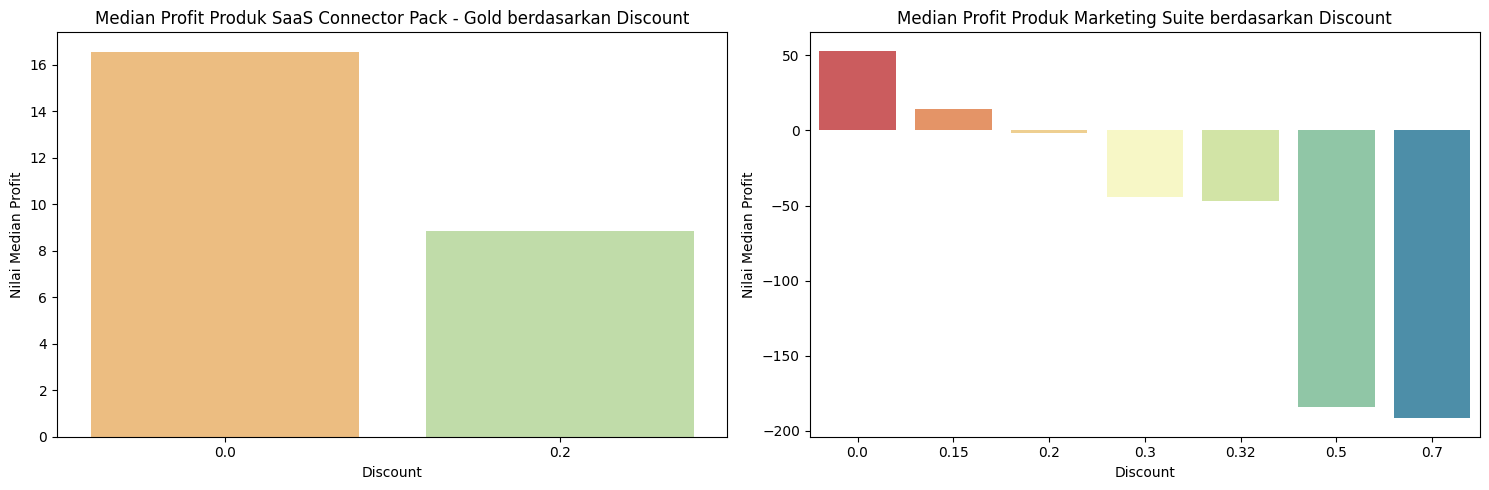

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)                
sns.barplot(data=df_SaaS_Connector_Pack_Gold, 
            x='Discount', 
            y='Profit', 
            errorbar=('ci', 0), 
            palette='Spectral')
plt.title('Median Profit Produk SaaS Connector Pack - Gold berdasarkan Discount')
plt.ylabel('Nilai Median Profit')

plt.subplot(1,2,2)
sns.barplot(data=df_marketing_suite, 
            x='Discount', 
            y='Profit', 
            errorbar=('ci', 0), 
            palette='Spectral')
plt.title('Median Profit Produk Marketing Suite berdasarkan Discount')
plt.ylabel('Nilai Median Profit')
 
plt.tight_layout()

- Produk SaaS Connector Pack - Gold hanya diberikan diskon 0 - 20%, sehingga masih bisa menghasilkan profit
- Produk Marketing Suite yang diberikan diskon 0 - 20% juga memberikan profit, namun, pemberian diskon lebih dari itu menyebabkan kerugian (loss)
- Maka, hal ini mendukung kemungkinan bahwa pemberian diskon lebih dari 30 % tidak efektif dan menyebabkan kerugian

----

**Total *sales* dan total *profit* berdasarkan *Industry***

Lalu, bagaimana dengan nilai *sales* dna *profit* pada industri customer tergabung?

In [51]:
df.groupby('Industry')[['Sales']].median().reset_index().sort_values('Sales', ascending=False)

,Industry,Sales
3,Finance,59.904
4,Healthcare,59.520
6,Misc,58.730
5,Manufacturing,56.605
9,Transportation,55.992
8,Tech,55.974
7,Retail,51.795
2,Energy,49.876
1,Consumer Products,49.650
0,Communications,44.128


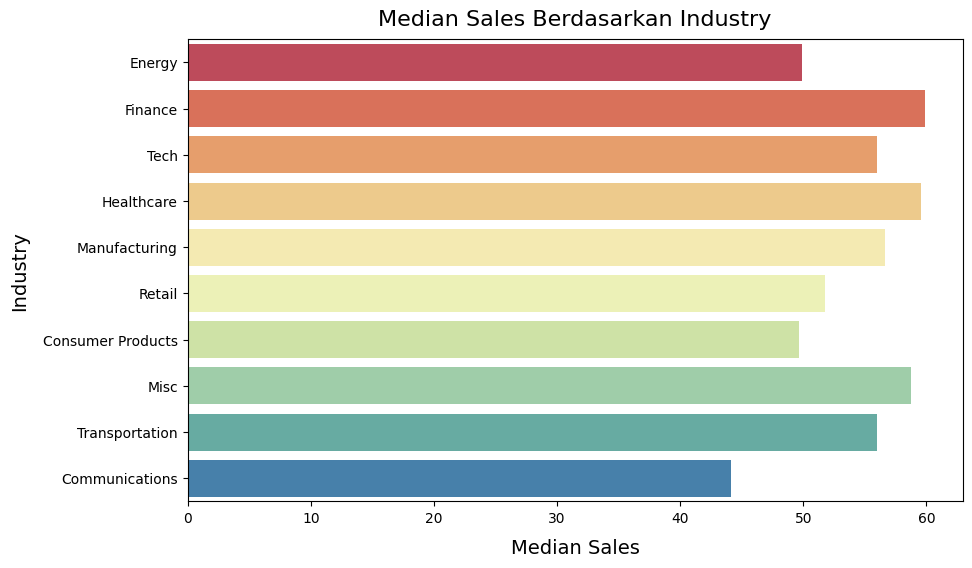

In [52]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=df, 
    y='Industry', 
    x='Sales', 
    errorbar=('ci', 0),
    palette='Spectral',
    estimator=np.median)

plt.title('Median Sales Berdasarkan Industry', size=16, pad=10) # pad --> mengatur jarak antara judul dengan grafik
plt.ylabel('Industry', size=14, labelpad = 10)
plt.xlabel('Median Sales', size=14, labelpad = 10)

plt.show()

**Insight**

- Jika hanya dilihat dari grafik di atas:
    - finance merupakan industri yang memberikan kontribusi nilai median sales terbesar
    - communications merupakan industri yang memberikan kontribusi nilai median sales terkecil
- Untuk memastikan apakah terdapat perbedaan nilai median sales yang signifikan pada setiap industri, mari kita lakukan uji statistik

In [53]:
# Uji Statistik dengan Kruskal-Wallis
from scipy.stats import kruskal

# Hipotesis
print('Hipotesis')
print('Ho : Tidak ada perbedaan median penjualan yang signifikan antar industri.')
print('Ha : Minimal ada satu median dari penjualan yang signifikan antar industri yang berbeda.')

# Uji Statistik Kruskal-Wallis
stat, pvalue = kruskal(
    df[df['Industry']=='Energy']['Sales'],
    df[df['Industry']=='Finance']['Sales'],
    df[df['Industry']=='Tech']['Sales'], 
    df[df['Industry']=='Healthcare']['Sales'],
    df[df['Industry']=='Manufacturing']['Sales'],
    df[df['Industry']=='Retail']['Sales'], 
    df[df['Industry']=='Consumer Products']['Sales'],
    df[df['Industry']=='Misc']['Sales'],
    df[df['Industry']=='Transportation']['Sales'], 
    df[df['Industry']=='Communications']['Sales'] 
)

if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada salah satu industri ada yang median penjualannya berbeda secara signfikan.
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada salah satu industri ada yang median penjualannya berbeda secara signfikan.
    ''') 

Hipotesis
Ho : Tidak ada perbedaan median penjualan yang signifikan antar industri.
Ha : Minimal ada satu median dari penjualan yang signifikan antar industri yang berbeda.

    pvalue = 0.40668. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada salah satu industri ada yang median penjualannya berbeda secara signfikan.
    


In [54]:
df.groupby('Industry')[['Profit']].median().reset_index().sort_values('Profit', ascending=False)

,Industry,Profit
6,Misc,15.18500
7,Retail,9.33120
3,Finance,9.08820
8,Tech,8.98300
4,Healthcare,8.86080
5,Manufacturing,8.79255
9,Transportation,8.67300
1,Consumer Products,7.68000
2,Energy,7.61380
0,Communications,6.90880


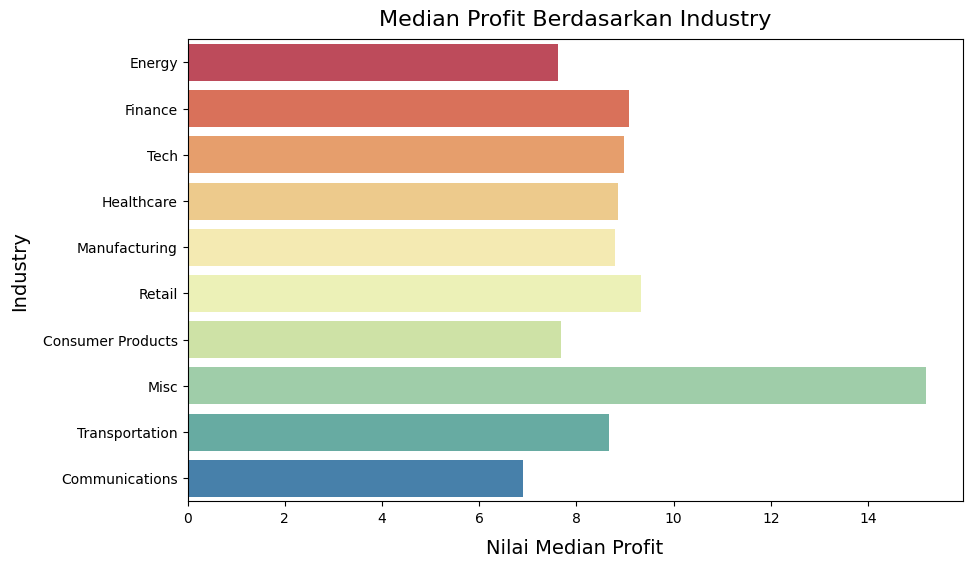

In [55]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=df, 
    y='Industry', 
    x='Profit', 
    errorbar=('ci', 0),
    palette='Spectral',
    estimator=np.median)

plt.title('Median Profit Berdasarkan Industry', size=16, pad=10) # pad --> mengatur jarak antara judul dengan grafik
plt.ylabel('Industry', size=14, labelpad = 10)
plt.xlabel('Nilai Median Profit', size=14, labelpad = 10)
#plt.yticks(range(-2500,901,300)) 
plt.show()

In [56]:
# Uji Statistik dengan Kruskal-Wallis
from scipy.stats import kruskal

# Hipotesis
print('Hipotesis')
print('Ho : Tidak ada perbedaan median profit yang signifikan antar industri.')
print('Ha : Minimal ada satu median dari profit yang signifikan antar industri yang berbeda.')

# Uji Statistik Kruskal-Wallis
stat, pvalue = kruskal(
    df[df['Industry']=='Energy']['Profit'],
    df[df['Industry']=='Finance']['Profit'],
    df[df['Industry']=='Tech']['Profit'], 
    df[df['Industry']=='Healthcare']['Profit'],
    df[df['Industry']=='Manufacturing']['Profit'],
    df[df['Industry']=='Retail']['Profit'], 
    df[df['Industry']=='Consumer Products']['Profit'],
    df[df['Industry']=='Misc']['Profit'],
    df[df['Industry']=='Transportation']['Profit'], 
    df[df['Industry']=='Communications']['Profit'] 
)

if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada salah satu industri ada yang median profitnya berbeda secara signfikan.
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada salah satu industri ada yang median profitnya berbeda secara signfikan.
    ''') 

Hipotesis
Ho : Tidak ada perbedaan median profit yang signifikan antar industri.
Ha : Minimal ada satu median dari profit yang signifikan antar industri yang berbeda.

    pvalue = 0.00438. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada salah satu industri ada yang median profitnya berbeda secara signfikan.
    


**Insight**

- Jika dilihat dari grafik di atas, industri misc memiliki perbedaan median profit yang signifikan dibandingkan dengan industri lainnya.
- Setelah dilakukan uji statistikpun, ternyata kita punya cukup bukti untuk mengatakan bahwa minimal ada salah satu industri ada yang median profitnya berbeda secara signfikan.
- Communications merupakan industri dimana customer tergabung dengan penyumbang nilai profit terkecil.

In [57]:
df_communications = df[df['Industry'] == 'Communications'].groupby(['Product'])[['Profit']].sum().reset_index().sort_values('Profit',ascending=False)
df_communications

,Product,Profit
3,Data Smasher,3568.4677
0,Big Ol Database,2510.7217
10,Site Analytics,1754.2020
12,Support,1576.3559
6,Marketing Suite - Gold,1129.4585
4,FinanceHub,851.0501
2,ContactMatcher,817.7196
8,SaaS Connector Pack,747.1012
7,OneView,673.5983
9,SaaS Connector Pack - Gold,452.8960


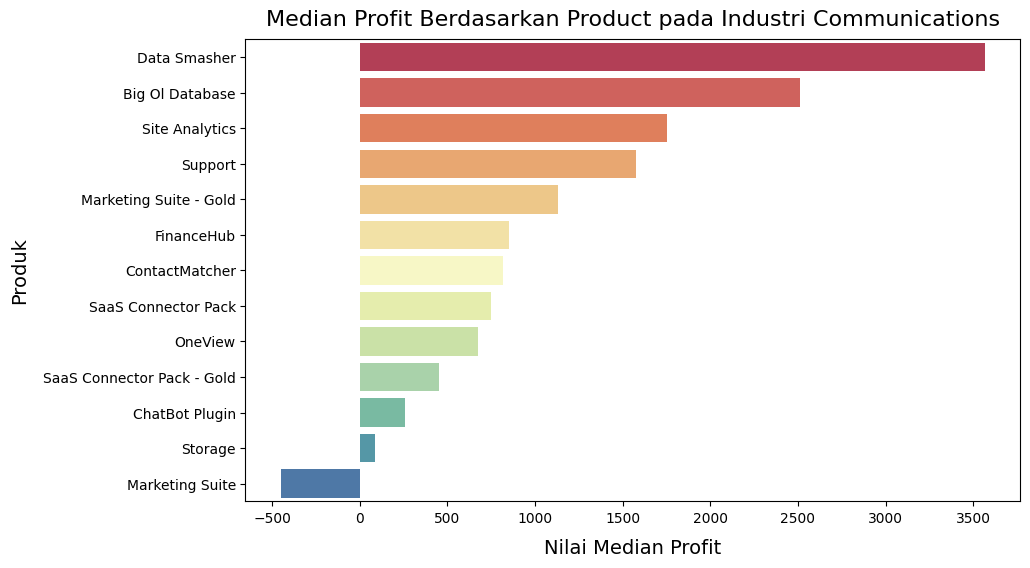

In [58]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_communications, 
    y='Product', 
    x='Profit', 
    errorbar=('ci', 0),
    palette='Spectral')

plt.title('Median Profit Berdasarkan Product pada Industri Communications', size=16, pad=10)
plt.ylabel('Produk', size=14, labelpad = 10)
plt.xlabel('Nilai Median Profit', size=14, labelpad = 10)
plt.show()

Ternyata, penyumbang kerugian terbesar bagi perusahaan dimana customer tergabung dalam industri communications juga disebabkan karena nilai profit yang negatif atas penjualan produk marketing suite.

----

**Total *sales* dan total *profit* berdasarkan *Region***

In [59]:
df.groupby(['Region', 'Country', 'City'])[['Sales', 'Cost', 'Profit']].sum()

Sales         Cost      Profit
Region Country        City                                               
AMER   Argentina      Buenos Aires     17640.846   13682.8650   3957.9810
                      Córdoba           7453.300    4748.8501   2704.4499
                      Mendoza           4088.600    2794.8253   1293.7747
                      Rosario           6581.566    4764.8578   1816.7082
       Brazil         Belo Horizonte    1903.055    1184.2964    718.7586
...                                          ...          ...         ...
EMEA   United Kingdom Liverpool         6017.130    4793.9149   1223.2151
                      London          257944.181  195725.5672  62218.6138
                      Manchester       10840.428    9235.5844   1604.8436
                      Newcastle         3827.190    2834.0749    993.1151
                      Woking            7657.666    4889.9103   2767.7557

[262 rows x 3 columns]

Keterangan: 
- EMEA: Europe, Middle East and Africa.
- AMER:  North, Central, and South America 
- APJ: Asia, Pacific, Japan 

In [60]:
# Region terprofitable
df_region = df.groupby('Region')[['Sales','Cost','Profit']].sum().reset_index().sort_values('Sales', ascending=False)
df_region

,Region,Sales,Cost,Profit
2,EMEA,1.043887e+06,896430.9700,147456.0450
0,AMER,8.378496e+05,710422.6147,127426.9898
1,APJ,4.154642e+05,403950.2539,11513.9869


In [61]:
# Region dengan profitable terendah (APJ)
df_apj = df[df['Region'] == 'APJ'].groupby(['City'])['Profit'].sum().reset_index().sort_values('Profit',ascending=False)
print(f"Terdapat {df_apj[df_apj['Profit'] > 0].count()[1]} kota di region APJ yang memberikan keuntungan (profit)")
print(f"Terdapat {df_apj[df_apj['Profit'] < 0].count()[1]} kota di region APJ yang memberikan kerugian (loss)")
print(f"Maka hanya {round(df_apj[df_apj['Profit'] > 0].count()[1] / 51 * 100,2)} % kota yang memberikan keuntungan (profit)")

Terdapat 31 kota di region APJ yang memberikan keuntungan (profit)
Terdapat 20 kota di region APJ yang memberikan kerugian (loss)
Maka hanya 60.78 % kota yang memberikan keuntungan (profit)


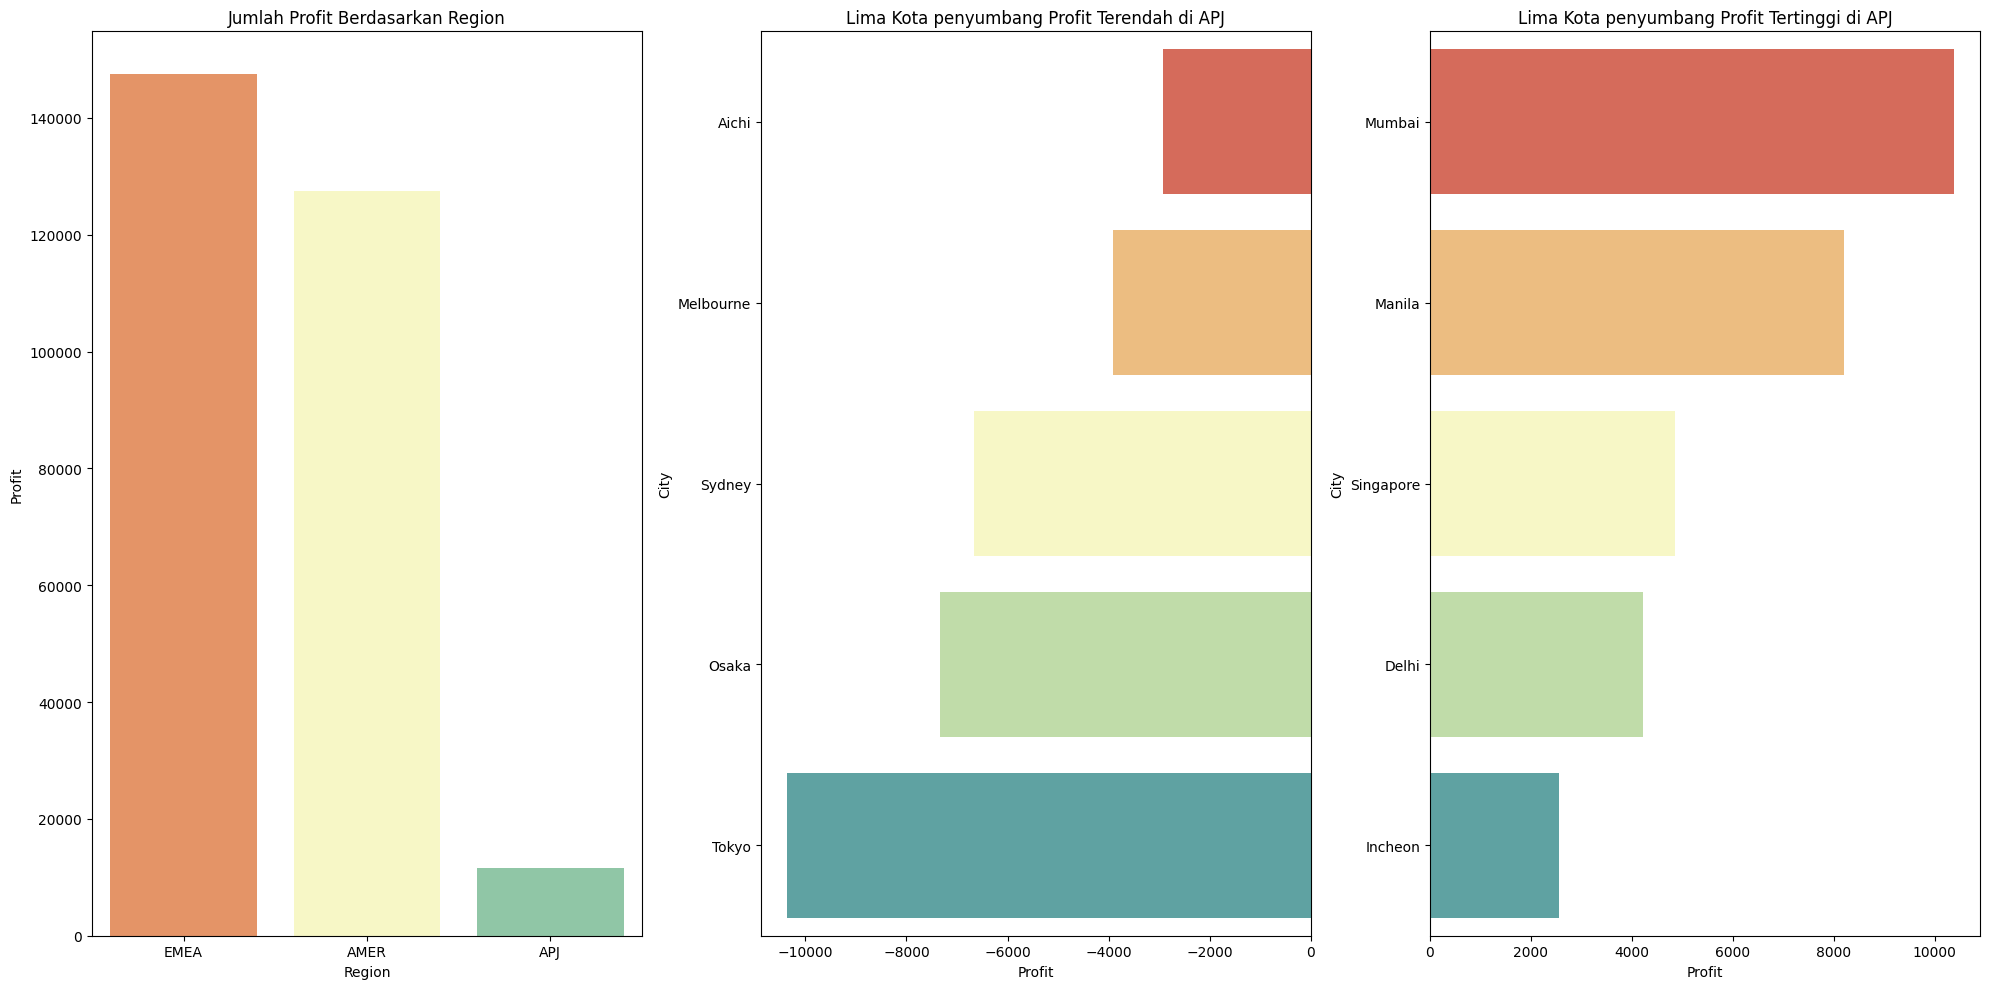

In [62]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)                
sns.barplot(data=df_region, 
            x='Region', 
            y='Profit', 
            errorbar=('ci', 0), 
            estimator=np.sum,
            palette='Spectral')
plt.title('Jumlah Profit Berdasarkan Region')

plt.subplot(1,3,2)
sns.barplot(data=df_apj.tail(), 
            x='Profit', 
            y='City', 
            errorbar=('ci', 0), 
            estimator=np.sum,
            palette='Spectral')
plt.title('Lima Kota penyumbang Profit Terendah di APJ')

plt.subplot(1,3,3)
sns.barplot(data=df_apj.head(), 
            x='Profit', 
            y='City', 
            errorbar=('ci', 0), 
            estimator=np.sum,
            palette='Spectral')
plt.title('Lima Kota penyumbang Profit Tertinggi di APJ')

#plt.xticks(range(-6000,60001,5000))  
plt.tight_layout()

- Region dengan Profit tertinggi adalah EMEA sedangkan region dengan profit terenda adalah APJ
- Pada region APJ, terdapat 31 kota yang memberikan keuntungan (profit) sedangkan sisanya sebanyak 20 kota memberikan kerugian (loss)
- Pada region APJ, kota Tokyo menjadi penyumbang loss terbesar sedangkan Mumbai menjadi kota penyumbang profit terbesar.

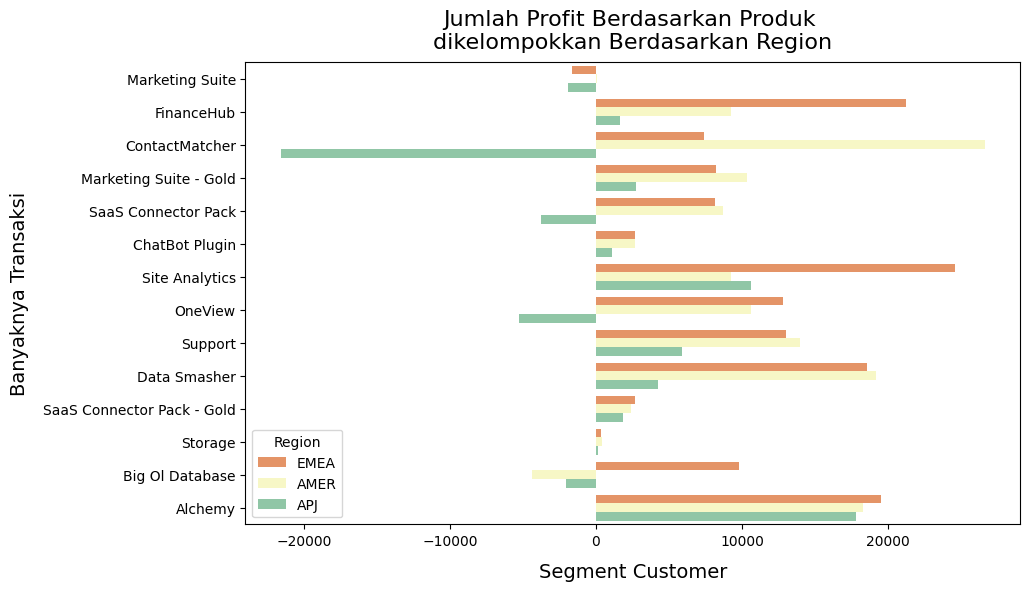

In [63]:
judul = 'Jumlah Profit Berdasarkan Produk \ndikelompokkan Berdasarkan Region'

plt.figure(figsize=(10,6))

sns.barplot(data=df, 
            x='Profit', 
            y='Product', 
            errorbar=('ci', 0), 
            estimator=np.sum, 
            hue='Region', 
            palette='Spectral')

plt.title(judul, size=16, pad=10) 
plt.xlabel('Segment Customer', size=14, labelpad = 10)
plt.ylabel('Banyaknya Transaksi', size=14, labelpad = 10)
plt.show()

- Pada region EMA, dari 14 produk yang dijual, hanya satu produk yang memberikan kerugian bagi perusahaan, yaitu Marketing Suite.
- Pada region AMER, dari 14 produk yang dijual, hanya satu produk yang memberikan kerugian bagi perusahaan, yaitu Big Ol Database.
- Pada region AMER, dari 14 produk yang dijual, terdapat lima produk yang memberikan kerugian bagi perusahaan, yaitu Marketing Suite, Contach Matcher, Saas Connector Pack, Oneview dan Big Ol Database

----

### **Kondisi Persebaran Kolom Numerikal pada Setiap Negara**

In [64]:
import os
import folium
import json

In [65]:
df['Country'].unique()

array(['Ireland', 'United States', 'Germany', 'Sweden', 'Canada', 'Japan',
       'Italy', 'Turkey', 'Costa Rica', 'France', 'Australia',
       'Luxembourg', 'Brazil', 'Philippines', 'India', 'United Kingdom',
       'Chile', 'Spain', 'South Africa', 'Portugal', 'Colombia',
       'Belgium', 'Russia', 'Netherlands', 'Mexico', 'Poland',
       'Singapore', 'New Zealand', 'Czech Republic', 'Saudi Arabia',
       'Argentina', 'South Korea', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'China', 'Austria',
       'Indonesia', 'Egypt', 'Denmark', 'Croatia', 'Taiwan', 'Qatar',
       'Slovenia', 'Iceland'], dtype=object)

In [66]:
df['Country'] = df['Country'].str.replace('United States', 'United States of America')

In [67]:
pd.read_json('world-countries.json').loc[1, 'features']['properties']['name']

'Angola'

In [68]:
sales_folium = df.groupby('Country')[['Sales']].sum().reset_index().sort_values('Sales', ascending=False)

country_sales_map = folium.Map(location = [0, 0], zoom_start = 1.8, tiles='cartodbpositron')

global_geo = r'world-countries.json'

folium.Choropleth(
    geo_data = global_geo, 
    data = sales_folium,
    columns = ['Country', 'Sales'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,nan_fill_color = 'white',
    legend_name = "Sales").add_to(country_sales_map)
folium.LayerControl().add_to(country_sales_map)

country_sales_map

In [69]:
profit_folium = df.groupby('Country')[['Profit']].sum().reset_index().sort_values('Profit', ascending=False)

country_profit_map = folium.Map(location = [0, 0], zoom_start = 1.8, tiles='cartodbpositron')

global_geo = r'world-countries.json'

folium.Choropleth(
    geo_data = global_geo, 
    data = profit_folium,
    columns = ['Country', 'Profit'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,nan_fill_color = 'white',
    legend_name = "Profit").add_to(country_profit_map
    )
folium.LayerControl().add_to(country_profit_map
)

country_profit_map


Dari dua peta di atas, kita dapat melihat bahwa sales dan profit memiliki warna yang kurang lebih mirip di seluruh negara, dengan United Sates sebagai negara dengan total sales dan profit tertinggi.

In [70]:
discount_folium = df.groupby('Country')[['Discount']].mean().reset_index().sort_values('Discount', ascending=False)

country_discount_map = folium.Map(location = [0, 0], zoom_start = 1.8, tiles='cartodbpositron')

global_geo = r'world-countries.json'

folium.Choropleth(
    geo_data = global_geo, 
    data = discount_folium,
    columns = ['Country', 'Discount'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,nan_fill_color = 'white',
    legend_name = "Discount").add_to(country_discount_map
    )
folium.LayerControl().add_to(country_discount_map
)

country_discount_map


Kita dapat melihat bahwa pemberian diskon secara umum lebih didominasi oleh Prancis, Japan dan Australia

In [71]:
qty_folium = df.groupby('Country')[['Quantity']].sum().reset_index().sort_values('Quantity', ascending=False)

country_qty_map = folium.Map(location = [0, 0], zoom_start = 1.8, tiles='cartodbpositron')

global_geo = r'world-countries.json'

folium.Choropleth(
    geo_data = global_geo, 
    data = qty_folium,
    columns = ['Country', 'Quantity'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,nan_fill_color = 'white',
    legend_name = "Quantity").add_to(country_qty_map
    )
folium.LayerControl().add_to(country_qty_map
)

country_qty_map


Terakhir, negara-negara dengan jumlah pembelian dengan kuantitas tertinggi adalah Argentina, Kolombia, Denmark.

### **Engagement dari Pembeli dari Waktu ke Waktu**

#### **1. Cohort Date**

In [72]:
df[df['Customer ID'] == 1017]

,Order ID,Customer ID,Region,Country,City,Order Date,Order Month,Contact Name,Customer,Industry,Segment,Product,Quantity,Discount,Sales,Cost,Profit,Profit Category
0,EMEA-2022-152156,1017,EMEA,Ireland,Dublin,2022-11-09,2022-11-01,Nathan Bell,Chevron,Energy,SMB,Marketing Suite,2,0.0,261.960,220.0464,41.9136,Profit
1,EMEA-2022-152156,1017,EMEA,Ireland,Dublin,2022-11-09,2022-11-01,Nathan Bell,Chevron,Energy,SMB,FinanceHub,3,0.0,731.940,512.3580,219.5820,Profit
171,AMER-2020-118962,1017,AMER,United States of America,New York City,2020-08-05,2020-08-01,Warren Forsyth,Chevron,Energy,SMB,Support,3,0.0,20.940,11.0982,9.8418,Profit
172,AMER-2020-118962,1017,AMER,United States of America,New York City,2020-08-05,2020-08-01,Warren Forsyth,Chevron,Energy,SMB,Support,2,0.0,110.960,57.6992,53.2608,Profit
173,AMER-2020-118962,1017,AMER,United States of America,New York City,2020-08-05,2020-08-01,Warren Forsyth,Chevron,Energy,SMB,FinanceHub,7,0.2,340.144,318.8850,21.2590,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,APJ-2023-163188,1017,APJ,Singapore,Singapore,2023-11-08,2023-11-01,Jennifer Avery,Chevron,Energy,SMB,ContactMatcher,9,0.0,38.160,19.0800,19.0800,Profit
9604,EMEA-2021-138625,1017,EMEA,Spain,Valencia,2021-11-02,2021-11-01,Benjamin Fisher,Chevron,Energy,SMB,OneView,4,0.0,197.720,142.3584,55.3616,Profit
9938,EMEA-2022-169824,1017,EMEA,United Kingdom,London,2022-12-13,2022-12-01,Chloe May,Chevron,Energy,Strategic,SaaS Connector Pack,5,0.0,60.350,40.4345,19.9155,Profit
9939,EMEA-2022-169824,1017,EMEA,United Kingdom,London,2022-12-13,2022-12-01,Chloe May,Chevron,Energy,Strategic,Support,4,0.0,35.520,25.5744,9.9456,Profit


In [73]:
# buat tabel yang berisi tanggal awal transaksi dari tiap customer
data_cohort = df.groupby('Customer ID')[['Order Date']].min().reset_index()
data_cohort

,Customer ID,Order Date
0,1001,2020-04-15
1,1002,2020-03-31
2,1003,2020-02-19
3,1004,2020-01-14
4,1005,2020-03-01
...,...,...
94,1097,2020-04-02
95,1098,2020-01-24
96,1099,2020-01-12
97,1100,2020-03-02


In [74]:
df['Cohort Month'] = df.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')
df.head()

,Order ID,Customer ID,Region,Country,City,Order Date,Order Month,Contact Name,Customer,Industry,Segment,Product,Quantity,Discount,Sales,Cost,Profit,Profit Category,Cohort Month
0,EMEA-2022-152156,1017,EMEA,Ireland,Dublin,2022-11-09,2022-11-01,Nathan Bell,Chevron,Energy,SMB,Marketing Suite,2,0.00,261.9600,220.0464,41.9136,Profit,2020-02
1,EMEA-2022-152156,1017,EMEA,Ireland,Dublin,2022-11-09,2022-11-01,Nathan Bell,Chevron,Energy,SMB,FinanceHub,3,0.00,731.9400,512.3580,219.5820,Profit,2020-02
2,AMER-2022-138688,1056,AMER,United States of America,New York City,2022-06-13,2022-06-01,Deirdre Bailey,Phillips 66,Energy,Strategic,FinanceHub,2,0.00,14.6200,7.7486,6.8714,Profit,2020-03
3,EMEA-2021-108966,1031,EMEA,Germany,Stuttgart,2021-10-11,2021-10-01,Zoe Hodges,Royal Dutch Shell,Energy,SMB,ContactMatcher,5,0.45,957.5775,1340.6085,-383.0310,Loss,2020-01
4,EMEA-2021-108966,1031,EMEA,Germany,Stuttgart,2021-10-11,2021-10-01,Zoe Hodges,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,2,0.20,22.3680,19.8516,2.5164,Profit,2020-01


#### **2. Current Activity Date**

In [75]:
df['Current Activity Month'] = df['Order Date'].dt.to_period('M')
df.head()

,Order ID,Customer ID,Region,Country,City,Order Date,Order Month,Contact Name,Customer,Industry,Segment,Product,Quantity,Discount,Sales,Cost,Profit,Profit Category,Cohort Month,Current Activity Month
0,EMEA-2022-152156,1017,EMEA,Ireland,Dublin,2022-11-09,2022-11-01,Nathan Bell,Chevron,Energy,SMB,Marketing Suite,2,0.00,261.9600,220.0464,41.9136,Profit,2020-02,2022-11
1,EMEA-2022-152156,1017,EMEA,Ireland,Dublin,2022-11-09,2022-11-01,Nathan Bell,Chevron,Energy,SMB,FinanceHub,3,0.00,731.9400,512.3580,219.5820,Profit,2020-02,2022-11
2,AMER-2022-138688,1056,AMER,United States of America,New York City,2022-06-13,2022-06-01,Deirdre Bailey,Phillips 66,Energy,Strategic,FinanceHub,2,0.00,14.6200,7.7486,6.8714,Profit,2020-03,2022-06
3,EMEA-2021-108966,1031,EMEA,Germany,Stuttgart,2021-10-11,2021-10-01,Zoe Hodges,Royal Dutch Shell,Energy,SMB,ContactMatcher,5,0.45,957.5775,1340.6085,-383.0310,Loss,2020-01,2021-10
4,EMEA-2021-108966,1031,EMEA,Germany,Stuttgart,2021-10-11,2021-10-01,Zoe Hodges,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,2,0.20,22.3680,19.8516,2.5164,Profit,2020-01,2021-10


#### **3. Total Distinct Subject**

In [76]:
df_cohort = df.groupby(['Cohort Month', 'Current Activity Month']).agg(n_customers=('Customer ID', 'nunique')).reset_index()
df_cohort

,Cohort Month,Current Activity Month,n_customers
0,2020-01,2020-01,27
1,2020-01,2020-02,9
2,2020-01,2020-03,11
3,2020-01,2020-04,11
4,2020-01,2020-05,14
...,...,...,...
357,2020-09,2023-05,1
358,2020-09,2023-07,1
359,2020-09,2023-09,1
360,2020-09,2023-11,1


#### **4. Period Distance**

In [77]:
from operator import attrgetter

df_cohort['Period Distance'] = (df_cohort['Current Activity Month'] - df_cohort['Cohort Month']).apply(attrgetter('n'))
df_cohort

,Cohort Month,Current Activity Month,n_customers,Period Distance
0,2020-01,2020-01,27,0
1,2020-01,2020-02,9,1
2,2020-01,2020-03,11,2
3,2020-01,2020-04,11,3
4,2020-01,2020-05,14,4
...,...,...,...,...
357,2020-09,2023-05,1,32
358,2020-09,2023-07,1,34
359,2020-09,2023-09,1,36
360,2020-09,2023-11,1,38


In [78]:
df_cohort.groupby('Cohort Month')['n_customers'].max()

Cohort Month
2020-01    27
2020-02    18
2020-03    26
2020-04    11
2020-05     6
2020-06     5
2020-07     2
2020-08     3
2020-09     1
Freq: M, Name: n_customers, dtype: int64

In [79]:
df_cohort['Max Customers'] = df_cohort.groupby('Cohort Month')['n_customers'].transform('max')
df_cohort

,Cohort Month,Current Activity Month,n_customers,Period Distance,Max Customers
0,2020-01,2020-01,27,0,27
1,2020-01,2020-02,9,1,27
2,2020-01,2020-03,11,2,27
3,2020-01,2020-04,11,3,27
4,2020-01,2020-05,14,4,27
...,...,...,...,...,...
357,2020-09,2023-05,1,32,1
358,2020-09,2023-07,1,34,1
359,2020-09,2023-09,1,36,1
360,2020-09,2023-11,1,38,1


In [80]:
df_cohort['Percentage'] = (df_cohort['n_customers']/df_cohort['Max Customers'] * 100).round(2)
df_cohort

,Cohort Month,Current Activity Month,n_customers,Period Distance,Max Customers,Percentage
0,2020-01,2020-01,27,0,27,100.00
1,2020-01,2020-02,9,1,27,33.33
2,2020-01,2020-03,11,2,27,40.74
3,2020-01,2020-04,11,3,27,40.74
4,2020-01,2020-05,14,4,27,51.85
...,...,...,...,...,...,...
357,2020-09,2023-05,1,32,1,100.00
358,2020-09,2023-07,1,34,1,100.00
359,2020-09,2023-09,1,36,1,100.00
360,2020-09,2023-11,1,38,1,100.00


In [81]:
df_cohort_pivot = df_cohort.pivot_table(
    index = 'Cohort Month',
    columns = 'Period Distance',
    values = 'Percentage'
)

df_cohort_pivot

Period Distance,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2020-01,100.0,33.33,40.74,40.74,51.85,70.37,59.26,48.15,85.19,62.96,...,77.78,59.26,74.07,66.67,70.37,55.56,100.00,85.19,88.89,85.19
2020-02,100.0,38.89,44.44,44.44,33.33,38.89,44.44,77.78,61.11,83.33,...,38.89,77.78,66.67,77.78,77.78,88.89,88.89,88.89,88.89,NaN
2020-03,100.0,53.85,42.31,57.69,57.69,57.69,84.62,57.69,69.23,65.38,...,73.08,76.92,69.23,76.92,92.31,80.77,80.77,84.62,NaN,NaN
2020-04,100.0,63.64,72.73,18.18,45.45,63.64,45.45,63.64,72.73,NaN,...,54.55,63.64,54.55,72.73,63.64,72.73,90.91,NaN,NaN,NaN
2020-05,100.0,NaN,16.67,33.33,66.67,50.00,83.33,83.33,16.67,16.67,...,66.67,33.33,83.33,66.67,50.00,83.33,NaN,NaN,NaN,NaN
2020-06,100.0,20.00,40.00,60.00,80.00,100.00,80.00,40.00,40.00,60.00,...,80.00,60.00,80.00,100.00,100.00,NaN,NaN,NaN,NaN,NaN
2020-07,100.0,50.00,50.00,50.00,100.00,50.00,NaN,NaN,50.00,NaN,...,100.00,50.00,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,100.0,66.67,33.33,33.33,66.67,33.33,NaN,33.33,100.00,66.67,...,66.67,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,100.0,NaN,NaN,100.00,NaN,100.00,100.00,100.00,NaN,NaN,...,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


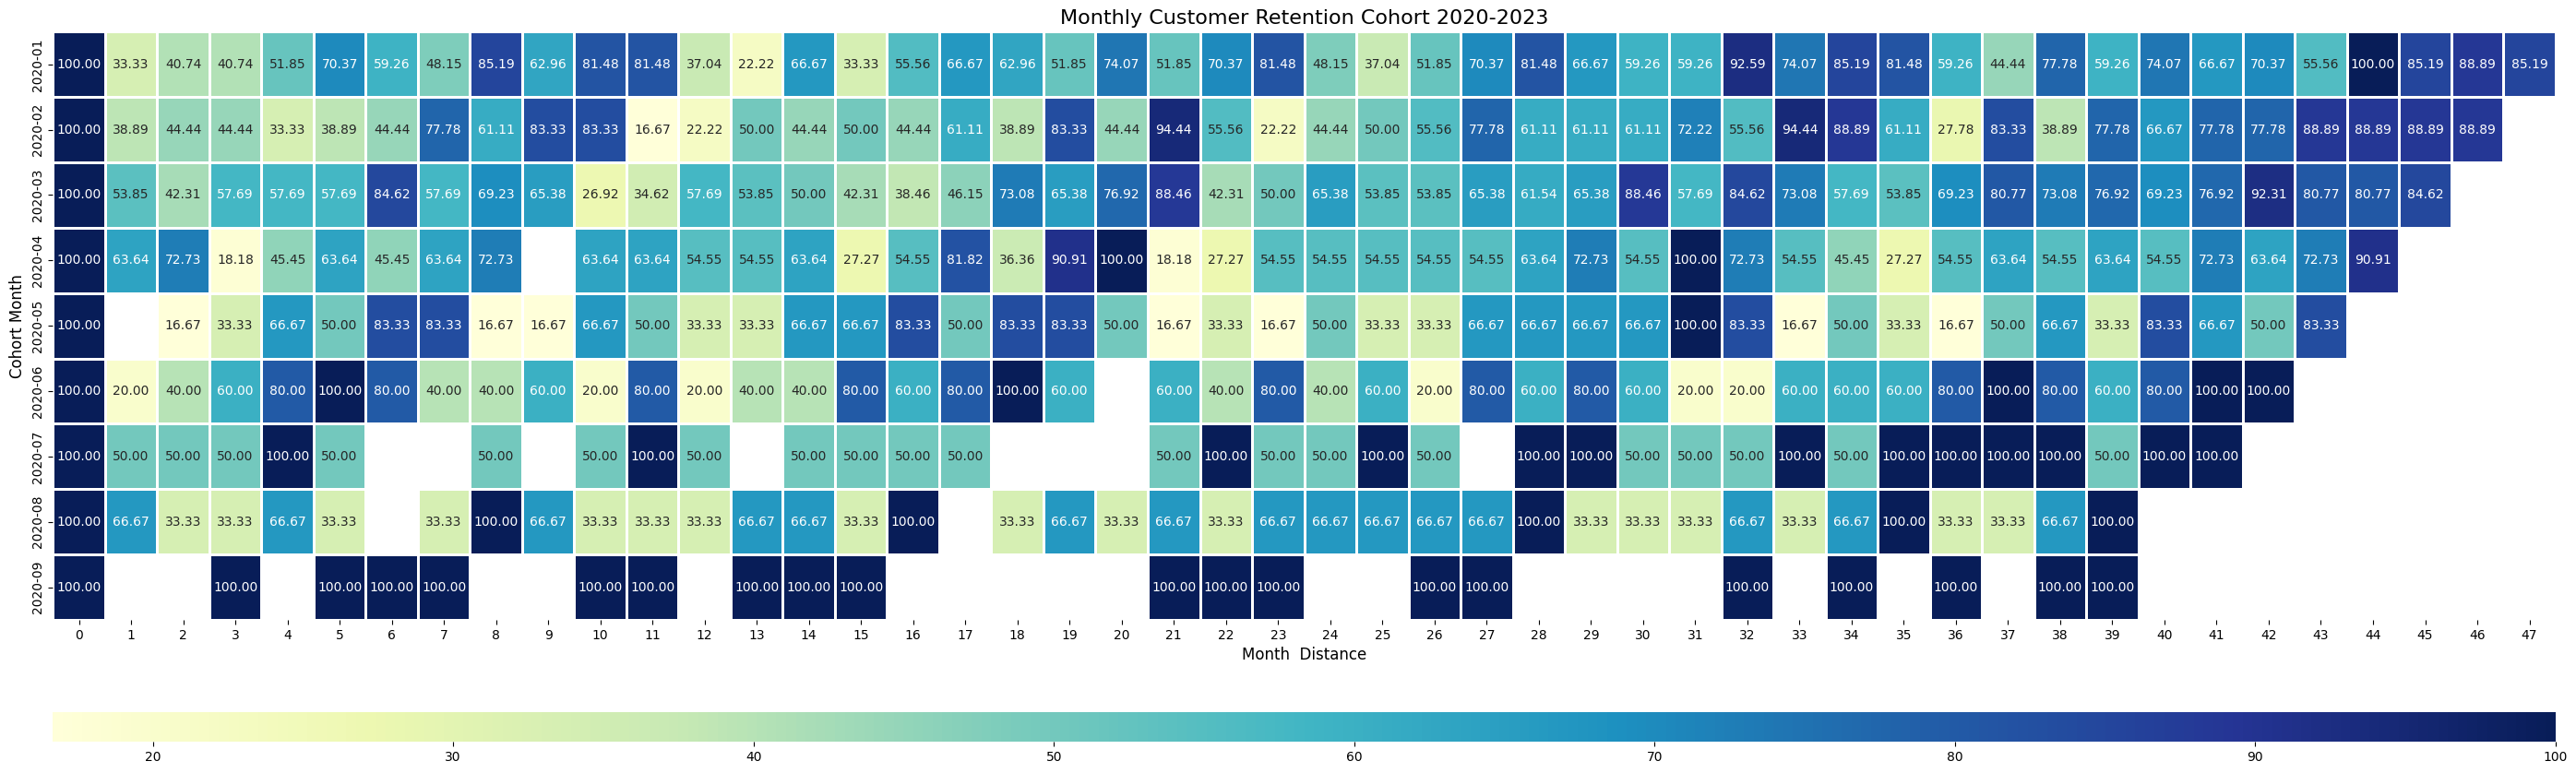

In [82]:
grid = {
    'height_ratios' : (20,1),                       # mengatur perbandingan tinggi antara subplot 1 dan subplot 2
    'hspace' : 0.3                                  # mengatur jarak antara subplot 1 dan subplot 2
}

fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(35,10), gridspec_kw=grid)

cohort_heatmap = sns.heatmap(
    data = df_cohort_pivot,                         # data
    annot=True,                                     # menampilkan anotasi/nilainya
    fmt='.2f',                                      # format anotasi --> 2 angka di belakang koma
    cmap='YlGnBu',                                  # menentukan palette warna
    ax = ax_top,                                    # menempatkan heatmap di sublot yang atas
    cbar_ax = ax_bottom,                            # menempatkan colorbar di subplot yang bawah
    cbar_kws = {'orientation':'horizontal'},        # mengubah orientasi colorbar menjadi horizontal
    linewidths=1
)

cohort_heatmap.set_title('Monthly Customer Retention Cohort 2020-2023', size=16)
cohort_heatmap.set_xlabel('Month  Distance', size=12)
cohort_heatmap.set_ylabel('Cohort Month', size=12)

plt.show()

- Secara garis besar, uktuk setiap cohort, persentase customer dari bulan ke bulan cukup fluktuatif, namun retensi pembelian dapat dikatakan bagus.
- Customer yang melakukan transaski pertama pada bulan Januari 2020 sampai bulan September 2020 cenderung terus melakukan pembelian ulang, bahkan di bulan Desember 2023 semua customer masih melakukan pembelian dengan persentase yang tinggi dan warna yang pekat.
- Namun, dari gambar ini dapat ketahui bahwa customer baru hanya terdapat pada bulan Januari 2020 sampai September 2020. Artinya, dari bulan Oktober 2020 sampai Desember 2023 tidak ada customer baru.
- Hal ini mungkin karena perusahaan menganggap bahwa biaya untuk retensi lebih murah dibandingkan dengan akuisi. Namun tetap saja terasa aneh apabila selama 3 tahun lebih tidak terdapat customer baru.

### **Efisiensi Pemberian Discount**

Menurut Cant & Toit (2012) loyalitas dapat didefinisikan sebagai ikatan emosional dengan perusahaan dengan melakukan pembelian ulang dari waktu ke waktu dan merekomendasikan perusahaan kepada orang lain, meskipun mereka memiliki pilihan lain. 

Dalam hal ini dapat disimpulkan bahwa pemahaman loyalitas sebenarnya tidak hanya dilihat dari seberapa banyak pelanggan membeli, tapi dari seberapa sering pelanggan melakukan pembelian ulang.

Mari kita analisis, lima customer dengan penyumbang sales dan pengulangan pembelian terbanyak.

In [83]:
# 5 customer dengan penyumbang sales sebanyak
df_loyal_cust_by_sales = df.groupby('Customer')[['Sales']].sum().reset_index().sort_values('Sales', ascending=False).head()
df_loyal_cust_by_sales

,Customer,Sales
10,Anthem,55719.2100
38,Ford Motor,43893.0424
4,Allianz,42904.1670
16,Bank of America Corp.,41255.9471
92,Valero Energy,41220.4188


Lima customer penyumbang sales terbanyak adalah Anthem, Ford Motor, Allianz, Bank of America Corp., dan Valero Energy. Lalu, seberapa sering mereka melakukan pembelian ulang?

In [84]:
# dari 5 customer tersebut, seberapa sering mereka melakukan transaksi?
Anthem                  = df['Order Date'][df['Customer'] == 'Anthem'].nunique()
Ford_Motor              = df['Order Date'][df['Customer'] == 'Ford Motor'].nunique()
Allianz		            = df['Order Date'][df['Customer'] == 'Allianz'].nunique()
Bank_of_America_Corp    = df['Order Date'][df['Customer'] == 'Bank of America Corp.'].nunique()
Valero_Energy           = df['Order Date'][df['Customer'] == 'Valero Energy'].nunique()

nama    = ['Anthem', 'Ford Motor', 'Allianz', 'Bank of America Corp', 'Valero Energy']
n_order = [Anthem, Ford_Motor, Allianz, Bank_of_America_Corp, Valero_Energy]

df_loyal_cust_by_n_order = pd.DataFrame(data=n_order, index=nama).reset_index()
df_loyal_cust_by_n_order.rename(columns={'index':'Customer', 0:'N Order'})


,Customer,N Order
0,Anthem,58
1,Ford Motor,95
2,Allianz,96
3,Bank of America Corp,63
4,Valero Energy,57


Definisi loyalitas yang dituliskan di atas menyatakan bahwa loyalitas tidak hanya dilihat dari jumlah pembelian. Akan lebih bijak apabila mengelompokan customer dengan pembelian ulang terbanyak sebagai customer loyal meskipun tidak menyumbangkan sales yang besar.

Mari kita lihat lima customer dengan pengulangan pembelian terbanyak.

In [85]:
list_cust = []
list_n_order = []

for i in df['Customer'].unique():
    list_cust.append(i)
    list_n_order.append(df['Order Date'][df['Customer'] == i].nunique())

df_loyal_cust_n_order = pd.DataFrame({
    'Customer' : list_cust,
    'N Order' : list_n_order
}).sort_values('N Order', ascending=False)

df_loyal_cust_n_order.head()

,Customer,N Order
65,Allianz,96
72,Ford Motor,95
13,Siemens,83
31,Tyson Foods,82
3,BNP Paribas,76


Lima customer dengan pengulangan pembelian terbanyak adalah Allianz, Ford Motor, Siemens, Tyson Foods, dan BNP Paribas.

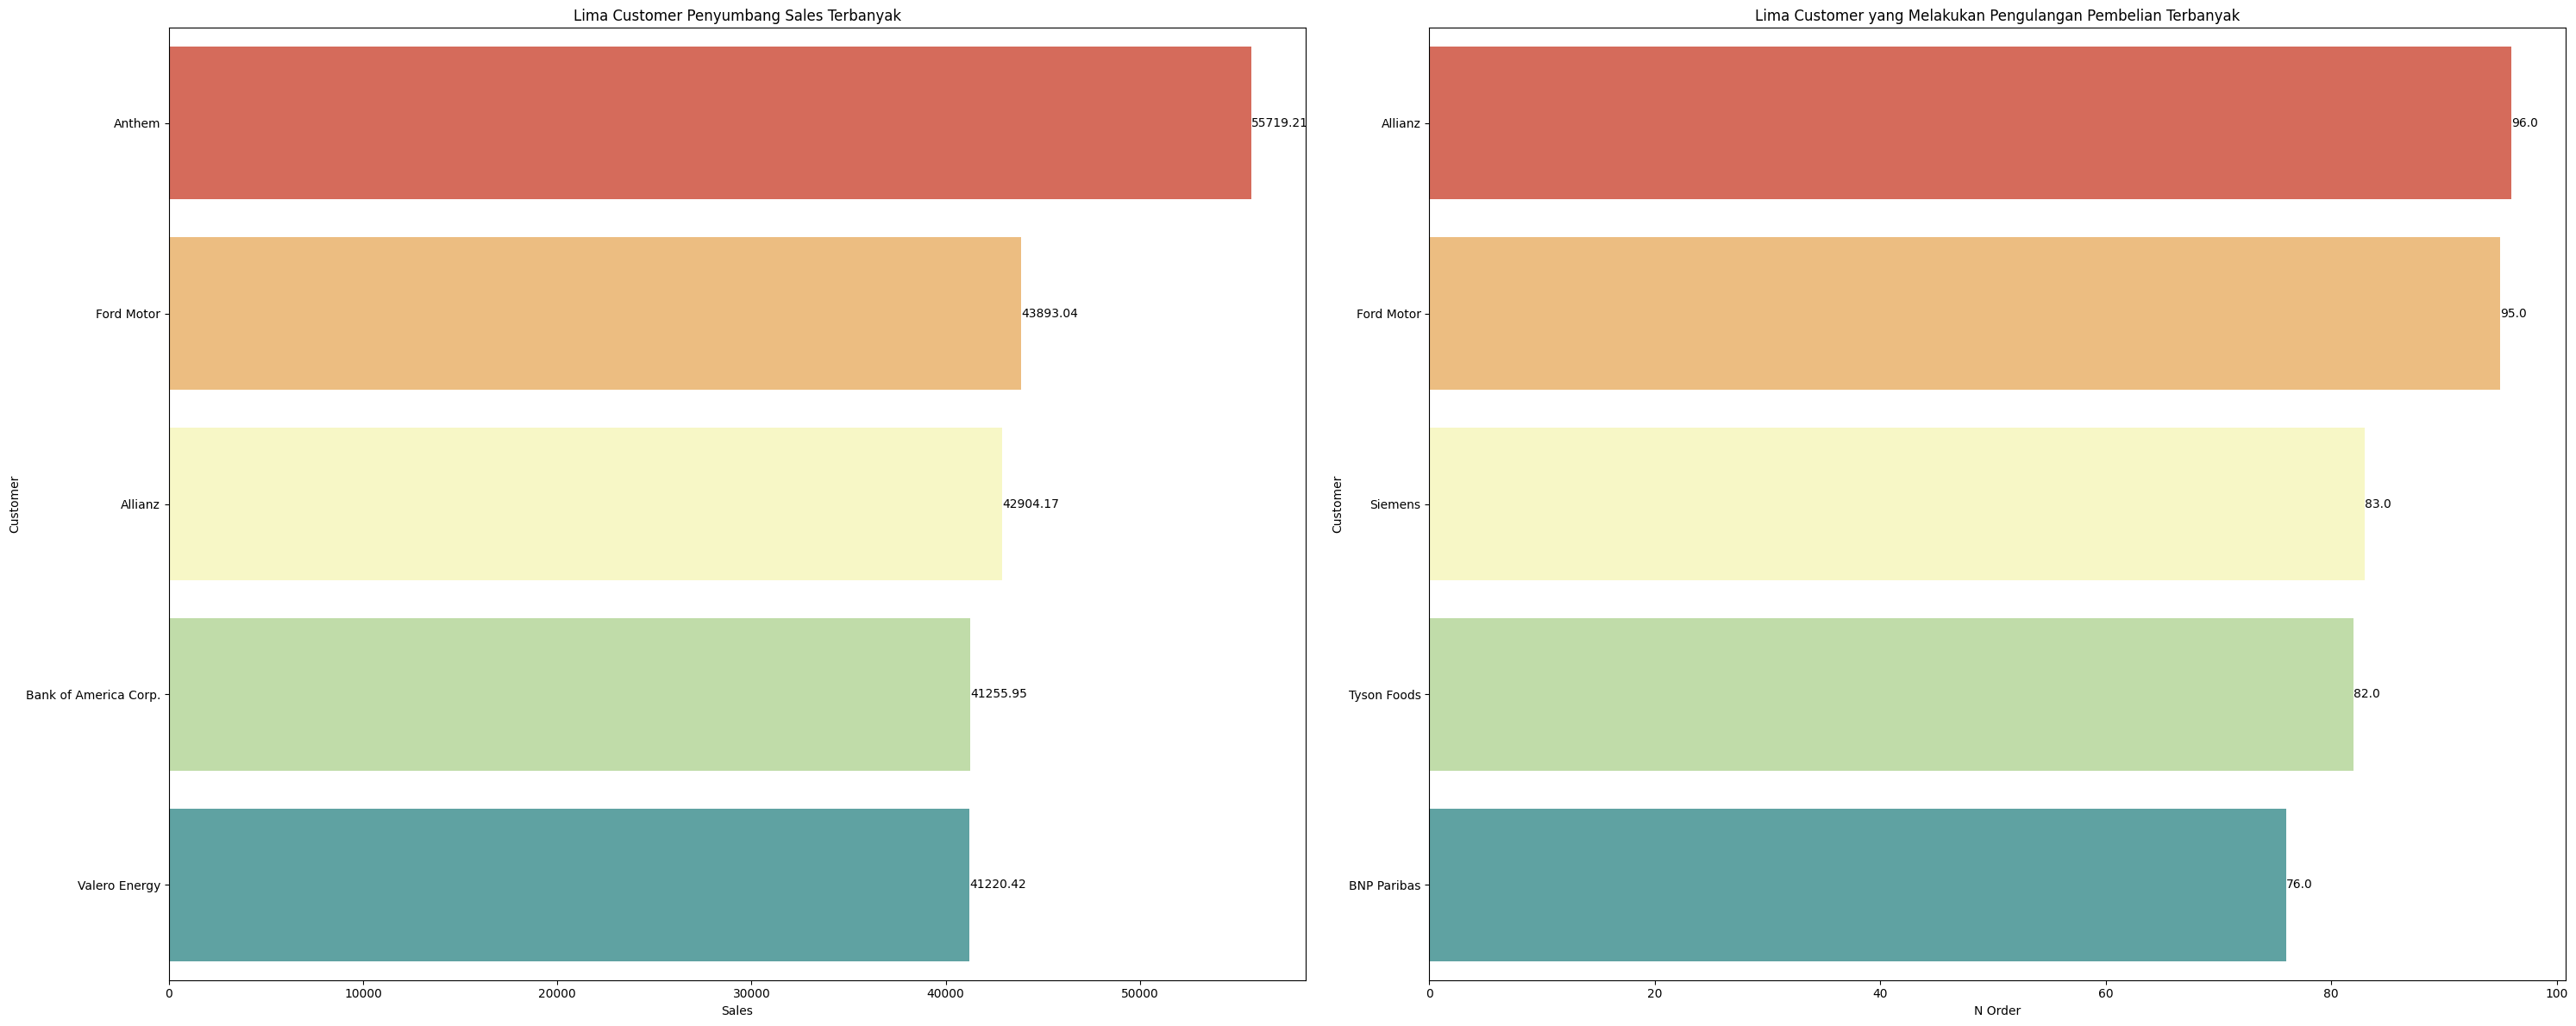

In [86]:
plt.figure(figsize=(30,12))

plt.subplot(1,2,1)                
ax1 = sns.barplot(data=df_loyal_cust_by_sales, 
            x='Sales', 
            y='Customer', 
            errorbar=('ci', 0), 
            palette='Spectral')
container = ax1.containers[0]
ax1.bar_label(container, [x.round(2) for x in container.datavalues])
plt.title('Lima Customer Penyumbang Sales Terbanyak')

plt.subplot(1,2,2)
ax2 = sns.barplot(data=df_loyal_cust_n_order.head(), 
            x='N Order', 
            y='Customer', 
            errorbar=('ci', 0), 
            palette='Spectral')
container = ax2.containers[0]
ax2.bar_label(container, [x for x in container.datavalues])
plt.title('Lima Customer yang Melakukan Pengulangan Pembelian Terbanyak')
 
plt.tight_layout()

Jadi, untuk mempertahankan customer loyal, perusahaan dapat memberikan diskon kepada Anthem, Food Motor, Allianz, Bank of America Corps., Valero Energy, Siemens, Tyson Foods dan BNP Paribas

****
# **Kesimpulan**
****

1. Kondisi nilai *net profit margin* perusahaan.
- Nilai *Net Profit Margin* didapatkan dari hasil bagi total nilai *Sales* dan total nilai *Profit*. Pada perusahaan ini, nilai *Net Profit Margin* sebesar 12.47%. Maknanya, dalam $1 atas *sales*, perusahaan ini memperoleh *profit* sebesar $0.12. 
- Dari 9994 transaksi tercatat, sebanyak 8058 atau 80.63% memberikan keuntungan (Profit), sebanyak 1871 atau 0.65% tidak memberikan keuntungan maupun kerugian (Neutral) dan sisanya sebanyak 65 atau 18.72% memberikan kerugian (loss).
- Fluktuasi *Sales* dan *Profit* terjadi sepanjang tahun selama 4 tahun berjalan. Terdapat beberapa kali penurunan *profit* ketika *sales* mengalami peningkatan seperti pada bulan Maret 2020, dan kondisi dimana *sales* turun, namun *profit* naik seperti pada bulan April 2020. Selain itu, terlihat pada bulan Juli 2020 dan Januari 2021, nilai *profit* turun bahkan sampai bernilai negatif dan menyebabkan kerugian (loss) sebesar -841.4826 dan -3281.0070.
<br><br>
2. Hal-hal yang memengaruhi nilai *net profit margin*.
- *Sales* dan *Profit* menunjukkan hubungan positif moderat, semakin tinggi nilai *Sales*, maka semakin tinggi juga *Profit*-nya. *Quantity* dan *Profit* menunjukkan hubungan positif weak, semakin tinggi nilai *Quantity*, maka semakin tinggi juga *Profit*-nya. *Discount* dan *Profit* menunjukkan hubungan negatif lemah, semakin tinggi nilai *Discount*, maka semakin rendah *Profit*-nya. Maka, *Discount* menjadi satu-satunya variabel yang berpengaruh negatif terhadap *profit* (-0,22).
- Secara keseluruhan, pemberian diskon kurang dari 30% masih memberikan keuntungan (profit), namun, pemberian diskon lebih dari itu memberikan kerugian (loss). Dari total 14 produk yang dijual, hanya ada 8 produk yang diberikan diskon lebih dari sama dengan 30%. Dari 8 produk dengan pemberian diskon lebih dari sama dengan 30%, hanya Big Ol Database (pemberian diskon 30%) dan Alchemy (pemberian diskon 40%) yang memberikan keuntungan (profit). Sisanya, memberikan kerugian (loss).
<br><br>
3. Analisis upaya peningkatan nilai *profit*.
- Produk yang memberikan *total sales terbesar* adalah ContactMacher (410378.2650), sedangkan produk yang memberikan *total sales terendah* adalah Storage (3024.2800). Produk yang memberikan *total profit terbesar* adalah Alchemy (55617.8249), sedangkan produk yang memberikan *total profit terendah* (loss) adalah Marketing Suite (-3472.5560).
- SaaS Connector Pack - Gold memberikan margin profit paling besar terhadap perusahaan, sedangkan Marketing Suite memberikan kerugian.
- Nilai profit margin SaaS Connector Pack - Gold sebesar 42.27% artinya dalam $1 atas penjualan produk Marketting Suite, perusahaan memperoleh keuntungan sebesar $0.42. Produk SaaS Connector Pack - Gold hanya diberikan diskon 0 - 20%, sehingga masih bisa menghasilkan profit.
- Nilai profit margin Marketing Suite sebesar -3.02% artinya dalam $1 atas penjualan produk Marketting Suite, perusahaan memperoleh kerugian sebesar $0.03. Produk Marketing Suite yang diberikan diskon 0 - 20% juga memberikan profit, namun, pemberian diskon lebih dari itu menyebabkan kerugian (loss).
- Communications merupakan industri dimana customer tergabung dengan penyumbang nilai profit terkecil. 
- Hal tersebut disebabkan karena nilai profit yang negatif atas penjualan produk marketing suite (-451.5362).
- Region dengan Profit tertinggi adalah EMEA sedangkan region dengan profit terenda adalah APJ.
- Pada region EMA, dari 14 produk yang dijual, hanya satu produk yang memberikan kerugian bagi perusahaan, yaitu Marketing Suite.
- Pada region AMER, dari 14 produk yang dijual, terdapat lima produk yang memberikan kerugian bagi perusahaan, yaitu Marketing Suite, Contach Matcher, Saas Connector Pack, Oneview dan Big Ol Database.
<br><br>
4. Kondisi dan persebaran kolom numerikal pada setiap negara.
- Nilai *sales* dan *profit* memiliki warna yang kurang lebih mirip di seluruh negara, dengan United States sebagai negara dengan total *sales* dan *profit* tertinggi.
- Pemberian *discount* secara umum lebih didominasi oleh Prancis, Japan, dan Australia.
- Negara dengan jumlah pembelian dengan *quantity* tertinggi adalah United States 
<br><br> 
5. Engagement pembeli dari waktu ke waktu
- Secara garis besar, uktuk setiap cohort, persentase customer dari bulan ke bulan cukup fluktuatif, namun retensi pembelian dapat dikatakan bagus.
- Customer yang melakukan transaksi pertama pada bulan Januari 2020 sampai bulan September 2020 cenderung terus melakukan pembelian ulang, bahkan di bulan Desember 2023 semua customer masih melakukan pembelian dengan persentase yang tinggi dan warna yang pekat.
- Namun, dari gambar ini dapat ketahui bahwa customer baru hanya terdapat pada bulan Januari 2020 sampai September 2020. Artinya, dari bulan Oktober 2020 sampai Desember 2023 tidak ada customer baru.
- Hal ini mungkin karena perusahaan menganggap bahwa biaya untuk retensi lebih murah dibandingkan dengan akuisi. Namun tetap saja terasa aneh apabila selama 3 tahun lebih tidak terdapat customer baru.
<br><br>
6. Efisiensi Pemberian Discount
- Discount yang besar sebaiknya diberikan kepada customer yang loyal dengan syarat melakukan jumlah pembelian banyak dan pengulangan pembelian terbanyak juga.
- Lima customer penyumbang sales terbanyak adalah Anthem (55719.2100), Ford Motor (43893.0424), Allianz (42904.1670), Bank of America Corp. (41255.9471), dan Valero Energy (41220.4188).
- Lima customer dengan pengulangan pembelian terbanyak adalah Allianz (96), Ford Motor (95), Siemens (83), Tyson Foods (82), dan BNP Paribas (76).

****
# **Saran**
****

Saran-saran di bawah diharapkan dapat membantu perusahaan untuk meningkatkan nilai net profit margin dengan menurunkan nilai kerugian (loss).

1. Untuk meningkatan nilai Net Profit Margin, bisa dengan memperbesar proporsi keuntungan (profit) atau memperkecil proporsi kerugian (loss). Namun sebaiknya memperkecil proporsi kerugian agar tidak terdapat nilai negatif pada profit.
2. Profit bernilai negatif diasumsikan karena nilai sales yang didapatkan lebih kecil dari pada cost yang dikeluarkan. Pada data ini, tidak disediakan rincian cost untuk setiap transaksinya. Namun, setelah dianalisis, discount termasuk ke dalam cost dan berpengaruh negatif terhadap nilai profit.
3. Discount tentu dapat mendorong minat beli customer terhadap sebuah produk. Namun, setelah dianalisis, pemberian discount yang efektif hanya sampai 20%. Lebih dari itu, akan menyebabkan kerugian (loss). Maka, sebaiknya perusahaan lebih bijak dalam memberikan discount lebih dari 20%.
4. United States merupakan negara dengan total sales dan total profit tertinggi, sejalan dengan kuantitas pembelian. Namun berbanding terbalik dengan pemberian discount. Negara yang diberikan discount terbanyak adalah Prancis, Jepang, dan Australia. Jadi, sebaiknya perusahaan memberikan discount yang lebih rendah untuk nagara Prancis, Jepang, dan Australia dan discount yang lebih tinggi untuk pembelian dari United States.
5. Sepertinya perusahaan mementingkan retensi daripada akuisisi. Namun, dalam tiga tahun terakhir tidak ada customer baru akan menutup kesempatan untuk mendapatkan nilai profit yang lebih tinggi. Maka sebaiknya perusahaan juga mulai berusaha untuk mendapatkan customer baru sambil tetap mempertahankan customer lama.
6. Discount yang besar juga sebaiknya diberikan kepada customer yang loyal saja dengan syarat melakukan jumlah pembelian banyak dan pengulangan pembelian terbanyak juga. Perusahaan dapat memberikan diskon kepada Anthem, Food Motor, Allianz, Bank of America Corps., Valero Energy, Siemens, Tyson Foods dan BNP Paribas